# Part 1: Text Processing and Exploratory Data Analysis

## 1. Data Preparation

In [69]:
#pip install nltk (in case you do not have nltk)
import nltk
import json
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isaac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
#We load the products info in a dataframe
products_path = '../../data/fashion_products_dataset.json'
with open(products_path, "r", encoding="utf-8") as f:
    products = pd.read_json(products_path)

display(products.head())

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


## 1.1. Pre-Processing text

In [56]:
#We create a function to pre-process a line
def build_terms(line):
    """
    Preprocess a line:
    ●  Removing stop words 
    ●  Tokenization 
    ●  Removing punctuation marks 
    ●  Stemming 
    ●  Transforming to lowercase

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    line = line.lower()
    line = line.split()
    line = [x for x in line if x not in stop_words]
    line = [stemmer.stem(word) for word in line]
    return line

## 1.2. Information to return when doing a search 

In [57]:
def get_products_information(products_df):
    elements = ["_id", "title", "description", "brand", "category", "sub_category", 
                "product_details", "seller", "out_of_stock", "selling_price", 
                "discount", "actual_price", "average_rating", "url"]
    
    # Selecciona solo las columnas que nos interesan
    products_df = products_df[elements]
    
    return products_df

In [58]:
products = get_products_information(products)

products["processed_title"] = products["title"].apply(build_terms)
products["processed_description"] = products["description"].apply(build_terms)

In [59]:
display(products.head(5))

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
1,893e6980-f2a0-531f-b056-34dd63fe912c,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...,"[solid, men, blue, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, men, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...,"[solid, women, brown,, grey, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co..."


## 1.3. Handle of category, sub_category, brand, product_details, and seller during pre-processing. 

In [60]:
# We join the category and sub_category into a single field
products['cat_subcat'] = products['category'] + ": " + products['sub_category']
display(products)

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description,cat_subcat
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
1,893e6980-f2a0-531f-b056-34dd63fe912c,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...,"[solid, men, blue, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, men, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...,"[solid, women, multicolor, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...,"[solid, women, brown,, grey, track, pant]","[yorker, trackpant, made, 100%, rich, comb, co...",Clothing and Accessories: Bottomwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,3705c6bd-6f23-529a-9b64-15b8fc568efa,Sleeveless Solid Men Jacket,,Oka,Clothing and Accessories,Winter Wear,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",,True,"1,379",40% off,"2,299",,https://www.flipkart.com/okane-sleeveless-soli...,"[sleeveless, solid, men, jacket]",[],Clothing and Accessories: Winter Wear
28076,f2a683e4-634d-5a11-8950-2d56b924576d,Printed Men Blue Regular Shorts,,Oka,Clothing and Accessories,Bottomwear,"[{'Fabric': 'Polycotton'}, {'Pattern': 'Printe...",OKANE,False,520,34% off,799,3.8,https://www.flipkart.com/okane-printed-men-blu...,"[print, men, blue, regular, short]",[],Clothing and Accessories: Bottomwear
28077,1efa858c-1360-59a6-9624-bb04eddb492c,Checkered Single Breasted Casual Women Full Sl...,,Oka,Clothing and Accessories,"Blazers, Waistcoats and Suits","[{'Color': 'Grey'}, {'Fabric': 'Tweed'}, {'Pat...",,True,"2,999",40% off,"4,999",,https://www.flipkart.com/okane-checkered-singl...,"[checker, singl, breast, casual, women, full, ...",[],"Clothing and Accessories: Blazers, Waistcoats ..."
28078,9fdfdd22-487b-599b-8be6-5dd00eb987c5,Full Sleeve Solid Men Casual Jacket,,Oka,Clothing and Accessories,Winter Wear,"[{'Color': 'Blue'}, {'Fabric': 'Nylon'}, {'Pat...",OKANE,False,"1,875",40% off,"3,125",3.8,https://www.flipkart.com/okane-full-sleeve-sol...,"[full, sleev, solid, men, casual, jacket]",[],Clothing and Accessories: Winter Wear


## 1.4. Handle of out_of_stock, selling_price, discount, actual_price, and average_rating during pre-processing. 

## 2. Exploratory Data Analysis 

### General Information of dataset

In [61]:
products.describe()

,_id,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url,processed_title,processed_description,cat_subcat
count,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080,28080
unique,28080,5953,5684,325,4,24,26855,535,2,1512,88,728,39,28080,5918,5595,24
top,51004dc4-4209-5986-b113-cd010479c59b,Slides,,,Clothing and Accessories,Topwear,"[{'Color': 'Black'}, {'Care instructions': 'Du...",,False,399,50% off,999,3.9,https://www.flipkart.com/okane-striped-men-rou...,[slide],[],Clothing and Accessories: Topwear
freq,1,544,11150,2009,27118,15310,112,1643,26436,1500,2080,3504,2605,1,544,11150,15310


### Average sentence length

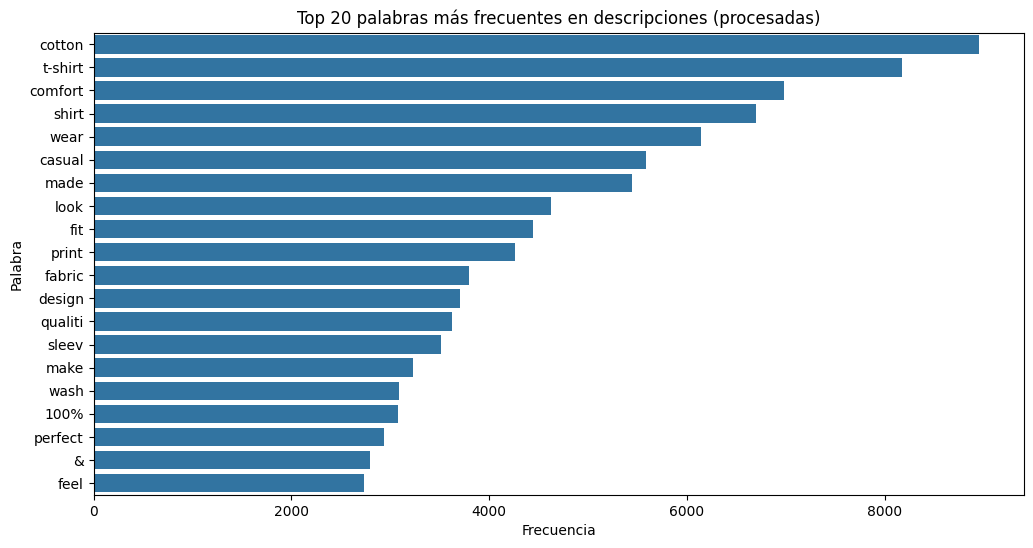

In [73]:
all_words = [word for tokens in products['processed_description'].dropna() for word in tokens]

word_counts = Counter(all_words)

top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 palabras más frecuentes en descripciones (procesadas)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

Promedio de palabras por descripción: 29.77


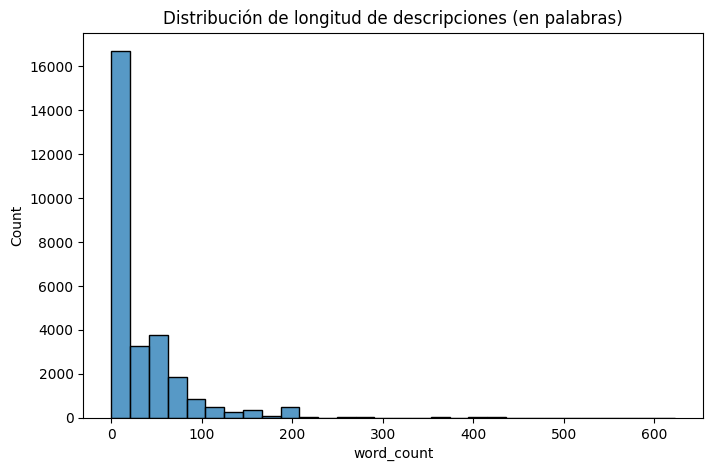

In [62]:
products['word_count'] = products['description'].apply(lambda x: len(str(x).split()))
products['char_count'] = products['description'].apply(lambda x: len(str(x)))
print("Promedio de palabras por descripción:", round(products['word_count'].mean(), 2))
    
plt.figure(figsize=(8,5))
sns.histplot(products['word_count'], bins=30)
plt.title('Distribución de longitud de descripciones (en palabras)')
plt.show()


In [74]:
vocabulary_size = len(set(all_words))
print("Tamaño del vocabulario:", vocabulary_size)

Tamaño del vocabulario: 8827


### Ranking of products based on rating

In [75]:
top_rated = products.sort_values(by='average_rating', ascending=False).head(10)
top_rated[['title', 'brand', 'average_rating', 'selling_price']]

,title,brand,average_rating,selling_price
5954,Women Regular Fit Solid Button Down Collar For...,MILD,5,563
17399,Women Regular Fit Solid Spread Collar Collar F...,Rose We,5,399
4220,Women Slim Fit Solid Casual Shirt,FOREVER YOU,5,725
17542,Women Solid Mid-Calf/Crew (Pack of 10),Cots,5,475
23909,Printed Men Round Neck Red T-Shirt,Free Authori,5,519
23906,Printed Men Round Neck Yellow T-Shirt,Free Authori,5,454
11309,Full Sleeve Solid Women Jacket,ECKO Unl,5,"1,874"
4354,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,616
4357,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,806
23852,Graphic Print Men Round Neck Blue T-Shirt,Free Authori,5,519


### Distributions

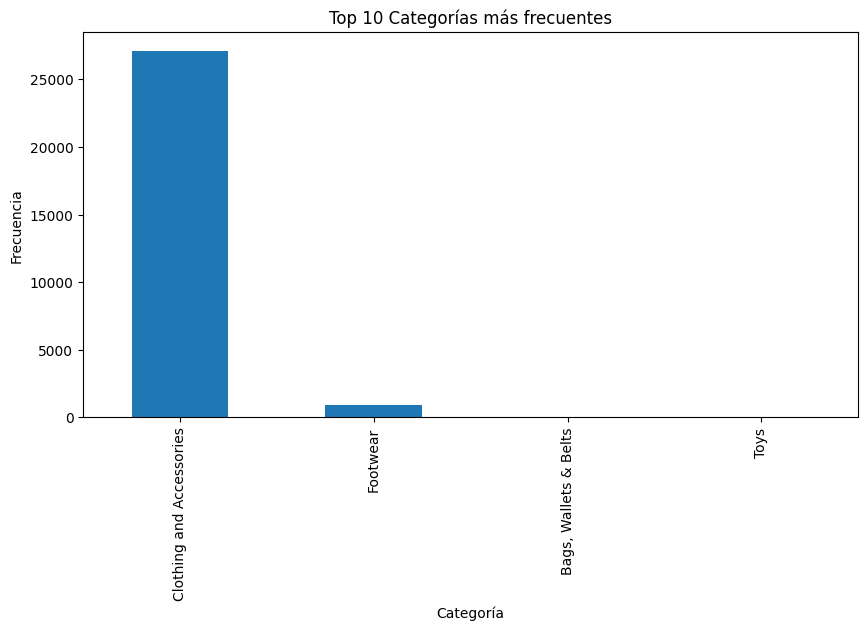

In [91]:
plt.figure(figsize=(10,5))
products['category'].value_counts().plot(kind='bar')
plt.title('Top 10 Categorías más frecuentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

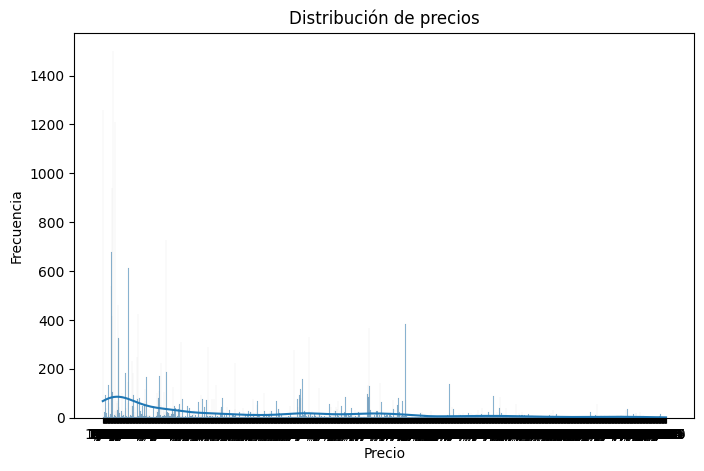

In [ ]:
plt.figure()
sns.histplot(products['selling_price'], bins=10, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

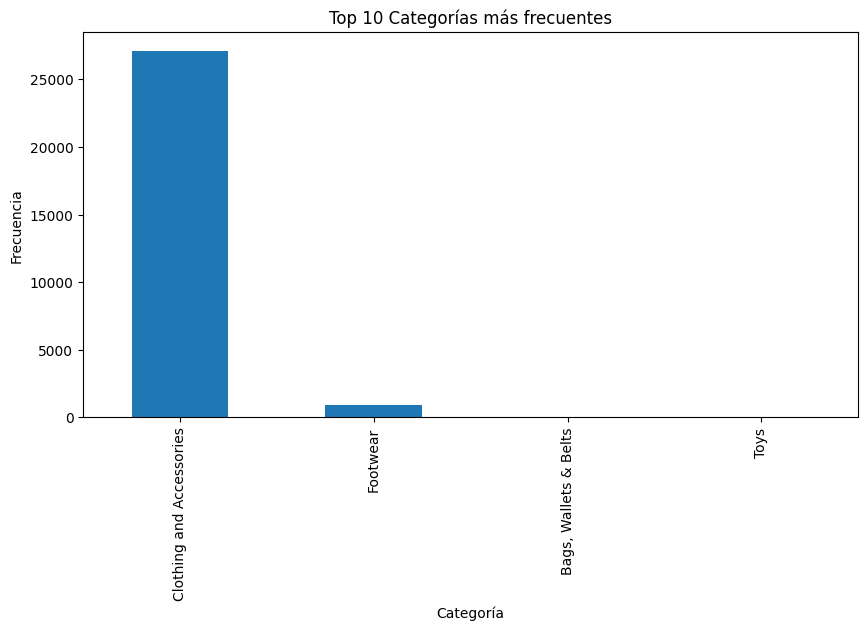

In [65]:
# 🏷️ 5. Distribución de categorías
plt.figure(figsize=(10,5))
products['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categorías más frecuentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


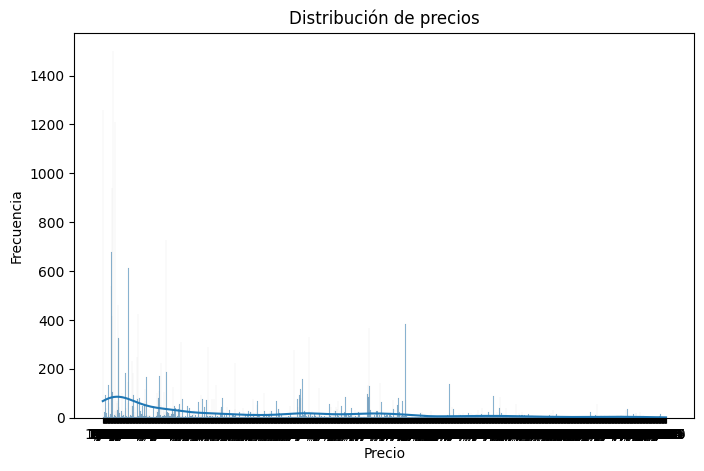

TypeError: Could not convert string '9214999319119431,1694665454895311,0749119111,0421,0439211,0461,0441,0399215314895311,0745215315111,0674914894994999315372804994993494994994995994994994998994994994995994994993494994995994994994994996994994994993493495994993493493494994993494994994993493493495994995395994993496994995995994994994993493494994993494995394993493493495996995998993493493494993493493493493493493493493493493493493493493493493493493493493493493493493493493493493493493493493493494993493495995993643994534643883993994994994993993993992993783993993993994993997772972972972893992973992971963992972973393193392974043392972972973393193193193392973192892892893392894493396492892974996496494994994994994994994994994994994994994994994994994994994993996494996494113993994993993193596496494994992971961,3399862,6993,3113,3112,5911,3491,0491,8081,6741,6749901,5401,5401,3391,2642,5911,3391,3391,3399392,2109201,3392,1592,6991,1992,1591,2972,6992,6993,3111,8082,9992,0091,0492,0099221,1791,3391,0491,4999901,5401,2499909991,5401,5401,6091,2979821,3391,5401,8081,5401,1991,2553,3112992992992992992992992992992992992995795795794992994994992992242792422262492662592992793292423293252592492492493292932492492992492992793992792992512993492992992992992792062792992992492992992792793492792243252292992993492992992593492992992592992492492692992492992792492992992292593992492992992992592992993498283992492492492592493252992493292492492992692992492992332792483493292992992992592992593292492992492993993143292992332492992794492992993292792423292993494494493292424494494492593253493494494492794494494493594493494494494493492995995995995995995995994995995995995995495495495494994994995494994994994995494994995505995995995505502012842782732683693232842252843232463693692842262843692843762952843693692842843692842842843692845382846316316316315386316316316316315385385385382845382843693693693752583692842842842842842842842842842842842842842842842842842612842842842843752842843693232842842842843412842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842842843232842842982842842842842842843232842842842842842842842842842842842842842843693693693692842842843702842792842842842842842842842842842538505667196299225668365661,0355661,1791,4086295666298637191,0351,0351,1798638597518959581,0798597248958958958958958958958959999999998507241,1028638631,0351,4088599718598599588638861,4351,4359991,1691,4357248998999588998991,0537247241,0538998991,0537249718991,0531,0618028998999858998991,0358591,0357508998999857509677509719678508997508997508991,0351,0351,4089858999547248998509227249678508998508501,0358591,0571,0571,0571,0571,0571361361784781282982232235992992882992993993293994994434434224203984204224204224204434433984224204204203984204204204113984224204494204113984204194114432844114113983984993984282843983984113983983983983983984434113983984114114743983983983984194204434114114113984114994744494114114114493984194194193984114113984114494113984113984114194224114224204207681,7098997681,4247686991,7096646996995991,4241,7996991,3431,4241,6146996998993981,4241,4241,4436837689998548541,4241,7996996996997681,4611,7996996996997686996996999496996996996996991,4496996999996991,4491,8994994991,8991,4496991,4496994996996994999999994996994996994994996994996999999996993996993981,4494999991,4499991,8996991,4494994994992,2853994994569994514997689996996996991,4248544999999999996996996999991,4997686644996646996647994997997497993994998544991,7996996991,7094364363613612843403403043042924083403333613044084083514083403403703333703703404084084043303703403333673704083703704083703703403703613613273403703043043562883123403333404455506009907905942492992992992991991992492992992992992992992992992992992992992992991992992992992992992992992992992998992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992992991992991992992992992992992991992992992992992992992992992991992992992992992992992992992992994214214174174174214214174178164178164178164174214178168168458458168168164998454174178458458458458458458458454994178458168168168164178168168168168168598168168168168168168168168168168168168168168168168598168168164998168168168168458168164998164178168164184174994994174998458452593493993994396306496196435996726206596756396296396496596636396796496496496496496496396796396596796496396606496296494494499996496796496296496496496496496496496496496496496496496496496496496496496496496496496496496496496496496496494496796793993993993993992891,0361,7191,0273794741408311,1257791,0497114,4998846201,8922,4871,0251,1339302,5706645641,3691,8013796438849191,5905995991,0446494741,0361,1259993791,2789402,4741,7993277992,4871,0374556001,0361,8505491,0363871,0377997687407059811,6706214271,1251,7191,2791,7751,6491,0394,4996506491,2617521,0493,8571,2591,3045994,1991,7041,5211,4128732,2491,2499745906048709661,2664,4997487691,1741891,6791,3991,0491,9271,8031,5701,6947408543792,0991,3791,7192,3151,7131,8147798241,7491,8147877798991,2747467251821,8142,8687683,1491,1891,3491,8011,2597497653656492,5991,3496591,9591,4991,0491,2731,0491,0995824105997449361,1551,1257142,0176017911,1656494,4991,2993712,4419741,0497796221,0491,3391,3851,3743381,0493534993732,9502,4607146328397591,7492,6591,3191,3045578448396011,2192,6597111,9271,4992,1011,5581,3597691,7991,6701,0491865998031,6491,3626521,4207174708163621,9531,4291,3497196212,6361,0491,7248383,2138003,2131,5746046182,0992,4421,0491,0101,2747482,4412376746491,2192,1411,8759547751821,4732,0091,0042,4497793,4995192,3991,9241,7496591,0046041,4775431,0491,0037721,4731,3397798448642,5712,5691,9521,1384,5007361879639741,1993,0719071,7187161,9883,4571,5993539322,2487877981,7377797201,0048992,5692,3779371,7199343,0604,4999992,4491,8741,1391,3741,3292,5717182,0091,0362,5551,7197991,7187795751,0043,8569741,7493,7491,8169742,5694997791,3742,0071,3392,7991,4998706369747361,9593,8571,9991,6971,3208036351,4129311,1251995991871,9831,2192,5707499098702,4741781,1789741,3391,5596662,3992,6592,6791,1311,1381,1787941,0048445312,1911,4391,2266057029591,2591,3502,2491,4191,0201,1911,3291,0044742,3096491,4991,2992,3447493,6991,9997711,0441991,5998082,6587273,0095273996601,3047191,8016491,4091,4368036872,5081,7494107148796407529741,9858031,0046495999341,4732,1441,2051,3299371,2319997779481,0496003,0097041,0047547193487499371,7789742,3091,2498701,7491,3392,0992,9991,0365057791,6093,9992,5991,2098704861,0041,0491,8422,9997998031,5392,0051,0367002367499489897368791,1719741,0498991,4362,3131,4361,1411,1381,5401,9591,5408331,2051,3498831,2491,0498705497791,0047691,5232,1528707,9991,1761,0497963,4991,0491,4694492,9999181,7991,1491,3122,4492,2101,3041,2991,2268799991,6091,1991,0046491,3198991,2096961,0491,1783998472,0991,0047927791,6741,2649483991,9992,3449371,0041,2759747147144491,8741,4481,3995591,0041,3958861,0492,3092,2747491,5292,0097141,5396571,3192,6242387492992,4491,3742,7997491,7122,7992,0992,2102,3091,6749347491,5391,5108031,3299422,0697618991,2721,3392,6222,0807681,2491,0048707792,3092,3092,6247791,4071991,0201,6741,1531,3391,0499997791,3991,0498701,3209681,8751,3392,0091,7491,2492,4991,5501,3392,0997791,6741,7541,3391,4261,3991,0491,3501,3391,6111,2722,2101,2726712,0092,3157497791,6742,2491,3997791,8751,1387079091,2999991,1728702,3581,6741,1541,2491,7491,0491,6509341,3461,1781,0494591,5391,3991,3291,3391,7121,3749801,2497492,6591,7991,4737774392,7997491,6741,1991,3991,0491,2737771,6241,1387491,2991,3397499901,6501,4731,8751,8754991,1781,5391,1419747251,5392,0098991,8871,5401,9591,7451,8199371,3291,5561,9421,0491,2997891,0492,0992,0992,0062,0994291,9591,9931,4992,0996492,0991,8161,5391,1991,5564,1992,0997774,1241,5391991,3991,7499851,4992,4499371,9592,3094491,6971,0049332,1831,4611,9851,3291,4999792,0997771,4142,1831,9591,5391,3201,3993,0092,3091,5391,9851,4241,7202,5141,3999091,7498444796321,8994692,3991,3994,8992,2501,3293,5352,1832,3151,9859092,0993,2781,1998441,9591,0398992684494494995003005005001995004993495005001995004991995004995005004994993493494994993494994993494994993494994994995004994995003503494994994994993005005004995002993493003494995004993495005004994993003003004994993494994994993995005004994992994994995003005005003493495004994994992993007495003493003494995002993494995005003004993493005004992992993493002994994995005002995003003002993004994993493492994994993004993003495003492354992994992993493004994994995003003005002995003493003003002994993003004994995004993003004994992992994995003003005005004994995005005005004994994993002993003495004995005004995003005004993004993003495004994994995004994992994993002995002993003003004505005005004994994994994995003495003005003505003504993505004993504993492994994994995005003004992997494993004995004994993494992994503495003492394993003495004994995002994991993001991994995003493494994993493493493493494993493493493493494993493493493493493493493493493503503504993503493503493493503493493493493495003503493493493493493503503493493491993491994992994994994992894894994994874994994994824994994998999999998999999998998999997997997997995597999999999998999998999999998999499498498992652652652652658489987395356981,3956839981,4953477981,4452,0976615481,4451,4951,5451,7451,6764867488735475475471,0984905254867987637874975475224975474907874725355474725455775355076617655225764723975976989737988231,0985359881,0988734729235253723975754864725475255254515355355223474516954865253724905255254516886955254474904475355255475474725354975224725255255255754225254725456955355354904975758955475565454725454724906268457387886965355453975561,3457388985455916885475454907258134866615354954908483976613979233979731,0483974866614979237135473728133473477525213974904866126964728737255357754907667258735565474978231,2954977456966129454906958955355224727526965567986266456969231,0486966965354957984905254866736485006965566483976956953471,5957885911,1457981,1454956956956951,5953475223473725564952,0956886957253971,1454728451,3951,3951,2757381,3953977381,3451,2754956967981,3251,4753725225561,6453476968234724724513475912,1958736951,8453977954861,7455771,6459064958737955486958738987385457983,1956969886882,0971,5951,2951,3955351,2951,2951,4754905211,1511,0481,2951,1451,4951,4952,1959061,2751,2759418451,4451,4452,0452,0458717251,1955991995996995993595995995992283994994995994998495995995998492598492593994492998492696994495998493998498496305994496305998492995993998492592592592593992994496996992494994994994992594992594995994498495994994494496993994498498494495998498498498495995998498494498499749744445114449495197229749744445759745524444893585119744894444443575199745194445195524445115199499495114894444895524894444895529495525115195114444445193894894445523899495524449495115524894444299495525529499495524494444444444444444444494204444994449749493894444993894446993584444994494995114994444444444445114444449744444449749744444444444444449744444444444443596999749749744444444446624596961,2993498999994995994996991,0496493992992992992994991,0493792994999991,2993495999993495993491,9994999999993994994494494493993999994994993992992992993995465995991,2995999999481886996991796494991783693691791884991884993694996996496496496994896996496993693696496496496994894894896494893693693693694994994991793696494402422242422422423098992302301,2344994997991701491491492992203703703701493701993703702252752253703703701351991991991991991351351991351498998994497995999999999999995994499999998998994498995995999995999998995997999995995998997999994498999999995995995998995995995995995995997999997994498997999998998988998998999998998998998998998998998998998998998998999999999999995999999999999995997995785999998995995997995995995995995995995997998998997998998998999999999995854501,9806744955854056995855854055859004957995854995254957654994901,9991,3954904501,4409009454901,4407659457994501,8952,4307201,4855859858991,8451,9806755895854501,3901,9007501,4991,4404509001,7997658457651,7107202,0995299995858991,6611,4009001,7908108496534509901,3059001,7101,5201,4402,3995999459998108491,5981,7911,3735856759007505854959006535257205859005699009005401,4859295857201,1701,1701,4994907208551,2609902,3404501,3469001,4405895858557991,3469001,2561,5204495635851,4401,1259901,3001,5536628997836089909009005851,4257651,1997651,5207501,0108401,1705498101,5994501,9505851,1701,3058401,4401,1705851,9504951,8951,1704809007651,3501,7065859001,1709009001,1708509901,1709009909909008109004491,1701,2497651,2991,6439252,3401,7999009009005859499009009009009991,1999007659005497997995857651,2958507651,6619997709492993495491991991991993493493494044044044293494044044044294044044044044042921992992492491994042191994044042494044044995494994995495345494993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993999431,0281,0371,2991,2996991,0361,2998991,0361,2996991,2997997996997997997997997991,2991,2991,2991,2991,2998991,0999998999431,2991,2999991,2996539991,2991,2999991,2991,2991,1999991,1991,1991,1991,1991,0999991,1991,0991,1991,1991,1991,1991,1991,0991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1998981,1996984981,0991,1995981,1993983991,1995981,1991,1995983981,1995981,0991,1991,1918985981,1991,1991,1993985991,1995981,1995991,0991,1991,0981,0981,0981,1991,1991,0987988901,1998916991,0981,1995981,0985981,0997981,1997981,1911,0988908901,0987998905981,2931,1991,1991,1993991,1993987761,1991,1919989981,1995983981,0991,1995981,1997911,1993981,1991,1998981,1991,1996987938986981,1996986931,1999937931,1997917981,1991,1992981,1996987986984993983987913983983995987995983998984994994995995995995995995995996298096296297598545994028547595995995996296297596296291,0481,0486298091,0486296298541,2348546298098096291,0481,0488091,0481,0481,0488091,0487258548094024028548545997256291,0481,0486298548548548548098098544024436996296998548546995998546297598998998998995998998998998998998993894494494294494493493193194293493493493193194293193193193194293494293193199999999999996471,2991,2991,2996476476475498995495495491,0247978117898919151,0191,0841,1761,0841,0353,5742,9997881,3703,6491,4391,1347978168998878991,3797992,6491,0499161,0848899058011,0841,1943,2498878873,1493,1494,5491,1391,3199031,0843,7044,0413,8991,1991,1998088068068066168068068068066168066168068068068066168068066166166166168064586168066166166166168068066168064588066166166168068066168066168066166166166168066166166164586166164584586546546164588064586548068066546166548066166546546548066548066546166166546546546546166166546548066168066548066546544586168068068066166166166546546546166546168066546166546166548066166546548068066166166164586548066546548068066548064584584588066546544588068066548068064586546164584586164586544584584584584584586544584584588064584584584584584584584584584584586544588068066548068064586168064584588066546166546544588068068066546546548066544586166546544588066546546548066548066168064586546548066166546166546546166166168066546546168068066168066166544588064588068066548064588064586544586166166166544586546168066164584584586168066546548068064584584584584584586544586548066544584588066544584584584584584588068066546546166544586166548066548064584584584586548066548068068066544586164588066162468068066166164586546166166166166546164586548062466546546542462462462468062466166166162468066162466166166162464582462462464743414044744044743993993794743794744743993994744743414744484744744744742843994744744744744743794743792844744743794744044744743793313794743793794744744743794743794993313794744264743793793994744744744744743414744747594994744744743794744744745694744745694264744744743794744744744744744743316644748544744744744743314747595694213794745693412844744744745696644744742844264266644264744743793314744745694264744744264264264265695694744743794744742992992992994994994994994994992744994992994994994994994992994994994992994992994992994992994994994992994992994994994992994992742744992994992994992742994994992742992992742747992996994494995994497495995996991,0996995995995995995995995995995994994504994995995995995995995995995995995994495991,0995991,0991,0995994995995994995991,0995995991,0991,0991,0991,0991,0991,0991,0991,0991,0991,0991,0998991,0991,3991,0995995991,6991,0996991,6991,6994995997495407494494996995996994417385497497491,3996981,6995498488488235491,3991,4981,4985991,1991,4985995995995995995995995995995998485997485997388488485991,4981,4981,4981,3481,4981,4981,4981,4988484498484995995991,0995995995995995995995995994995991,0995991,0991,0992992992992992991,2348954758954758958951,2348948958951,2341,2348951,2348951,2341,2341,2348958958958958951,2341,2341,2341,2341,2341,2348948958951,2341,2348951,2341,2341,2348958951,2341,2341,2341,2341,7348951,2341,2341,2348951,7341,2348958951,7342181806994954956994956994954956994956994954954954954954954954954954954954954954954954954954954954956996996996994956996996996994956996996996996996996996996996996994956996996996994956996994954952992994956996994954952996992994952992996992992992994954954954954954954952994954954954954954954954952994954954952494954952994954954952992994952992992992992992992992992992996992992994954954954954954954954954954954954954954954954954954954954952994952494954954954954954954954954954954955994995995995995995995995995995995995995995995995995994994994995995995995994995995995995995995995995998996998995555998998998996996995991,2991,2991,2996996996991,2996991,2991,2996995995998995995995995995995995995995995995996995995995445995995995995026995996996996996996996996996996996996995996996996996996996996996996996996996996996996996996996996996996996996996996996995996996996996996996996996996996996996996996995995995994995999995999995425995995995995995995995995995995995995999995996995995995996995995995995995995445995995995995995995993998998998998998999998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998998995448998995028998998993492993494865742797827827855849817034865849813823845094859795759843139849815849814844844414543844419849809807822751,1704459821,1785844541,1871,1783593762687821,3747823887023847023841,2494361,1784456294857048618589824867051,3741,1971,1879805843794874854534873845844547059825199824941,1794411,3743845199805394541,5481,3744854889774948625033991,3755634539793846131,1713734949809822901,1804875194541,4991,1768613995841,1729844494544944945654457056493353491,1753999823994943841,3752914454391,3993193996131,1709809791,2593992936133493296135097043533993183194853743595133994844544865301,3742923994944314445195301,1707833193843495199795845391,1715395844864855195393595395844495191,1729785193844493,4994541,3743993995015394547045393,4993193199804943593995393599815191,2493199803193593193999814493423193194943594493193196594543592692694493593593591,0491,5991,2991,1991,6561,7591,3992,1991,9991,4991,7991,4951,4991,5991,7991,6991,5991,5992,2991,7992,2992,1991,4991,6991,8991,8991,6992,0991,6991,8991,2991,9991,8991,9992,1501,9991,6991,2991,8993308998998992,4991,1001,5992992991,3992,2433303993999992257996917996997497497496996992943272892894545394194194194194196106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106106101,1666106101,1666101,1666106101,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1666101,1661,1666101,1661,1661,1661,1661,1666101,1661,1661,1661,1661,1666106101,1661,1661,1661,1661,1661,1666101,1666106106106101,1666106106106105635635635635635635635632992697999997997997997996927687207997907907997997907997907907909997997907997907999997998757781,4757907517997908757787996759507907998757997998757259997907999997907997998757997906647909999999997999999997999997999019999999999999997909997999999991,3519999999997997997997997997999999999997997751,0997957999997997999999999997999997997997999999999999999999997999997999997997997997997997997997997997997997997997997997997997997997997997997997997997997997999997997997997999997991,2516997997997997997997997787999997999999997999999995,2007997997997999997999997999996276276276273616846846273616843706276846846846846846846843613706846846846843706846843706847203907203903793793793793793793793793793793793793793793793793797593793794494494494494494494497994854364994364858994367196474365828994364394364895827994997997997997998997196477998994366477995827198997998998998997997198997194364365888544991,1991,2995944494455451,4951,4958995195998455995454994986994254494433895943894331,2994994494494495995994464497995993899992992994992996992993891,4955999955942995999959995946991,4498865195656998995999995657758995994195451,2455194253699955945455855453695995755454807953696954494494494493956956954574494497751,2454497759954497753991,1759995993951,1757754996991,1751,2451,1753699953954695994607751,1753693693694697754691,0953696995991,2454453381,2451,2991,2452961,2458455198455945998995196995994451,0454998995191,1194794359999999999999994453994194994254994255198454254254254254254254254254254253954254258455754252991855294595293295294595295295295295295296295295295293295295296295295295295295295295295295295295295294294295295293295293293293294293295294595294594594596492993493793493793793493493493492693793493493493493792993793793793493492992692992992692692994693792992692992692992766946946946946946946946946946946946946946942162431812433084053083082432433994054053602172804052164054054052181988992995501,6995502996661,6991,6997997998992997997997998992997997997997498991,5981,5988991,5981,5981,5981,5981,5981,5981,5981,5981,5981,5981,5987491,6997496996997497497497497497497497491,6992997497497497497497497997992996995507992995505505505505505507495505507997995507995502992992992992992992992992992992992992992998998998998992998998998998992998998998992998992998992998998998998998998998997492995508998998995508998998992992998998997999995508995508997992998992995502997997992997997997992997997997997992995507996665507996997997997995507997997997991,6987997997997991,6981,6981,6981,6981,6981,6981,6981,6981,6981,6981,6981,6981,6987999997997997997997997997997997997997991,6987997997997998997991,6997997996661,6981,6991,6981,6989997995507997997991,6991,6987991,6994507991,6996997991,6991,6991,6997991,6992998991,6991,6996997997991,6998991,6997991,6997997997997992991,6987997992997992637997997997997997998997998992997997997997997997998997997992847997991,6992,2991,6997997997997992,2997992872997994996,4935,3941,4114,1944,1943,5943,4932,8204,9904,1931,2455,2431,1741,7941,4945,1885,9904,4935,2433,9465,2434,2285,2434,2283,4935,8435,0605,8435,9904,9901,1751,6931,1753,4932,3945,9903,3853,3801,4943,7527,7945,9904,5156,9252,0943,3806,6921,6922,8152,8153,3852,8154,1943,6725,3945,8432693797996997996987766986996987766986983985984985986987771,1913985983986995996986983984997935993983985983986998933986991,1913993996988903988913999989989983987989985983985981,1916985988983995983986986991,1915983983993983983986986981,1993986996983993985983987938901,2935981,2936981,1993995983984993985986926986987766984981,1911,1991,1995988014987998987983981,1997985986996983991,1997997997995998906998915984994994999991,2494994996694994991,1495391,3194996395645694994999494999996691,3195895695895895895299494995694995699495699699498996391,3498996391,1494995695699499496699695699496694999496398995694996498995694998998991,1491,1498546694994996696696696696491,3196691,3195395395696196196196495894999696396495896947996537406996996386996996996676996356996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996994025743843614025844025705707535708549798469096086085575575565566085565575575575565565705334621,0826404518326085445706067535846093613613613617531,4357032,1021,9666231,1233,2921,7547621,4051,3601,6551,5481,2142,6533,8985841,3121,2481,6501,4711,2291,3236673845703847584027538921,1956646461,7421,3196396464026461,5921,9452,0962,0962,3912,0351,8082,8352,3182,4093,2431,6592,5953,0713,0632,6042,3932,8731,7282,9642,0382,7742,4072,4632,4892,8732,1322,5012,8753,1032,1361,9333,2881,9233842,2462,7843,5053,4064,0354,0293,6714,7833,5704,2326461,7283844695843992993392992993992992992992992993993993393992993992993392993393392993392992993392993393393993393393992993993393393393393392993393993393993993993393993993393993392993993393993993993993993993993393993993993993993393993393393393393993392992993393393393392993993992993693993993993493993993393993393997997997997993105494494252994102722853555255256992453657496495259499491,0499498453657495998459493253253251,0493253494993493253253253253253203203493253253253203253253201,0493256253355258493355494498495253253253353493253353253353493253493352498496994992999493556991,2996993496991,0753256853493496995495996256256356354998491,3496492907255991,2993253993493358755256496252906491,3491,0493554991,4997991,5993492992991,3494992352354493556493153255253493253993493496991,5493251356991,2756991,1996991,2751,2756492,9996996996496996992,9992,9997991,2751,2756295993991,2753991,2751,2753991,2756991,2751,2751,2756991,2751,2755996991,2751,2751,2751,2756991,2751,2751,2751,2756291,2756991,2756491,2756991,2753991,2756996991,2751,2751,2752502502492521991185355353908551,4951,3955045049958508508707257257658508508508508508509958509959106666668551,4958106667601,8756661,3953337657258101,3951,3801,3957657651,8754757607607607607608557607607607657607657607607607607657607607603337607608557607607607606667608558558407653338403337658558557656667607657606666666668553331,7958558556668558557601,5656664701,4958506665047601,7951,3807657407656407407405551,3807257257257257257407251,8956405401,4951,4951,4951,8751,6101,3805705701,8751,7561,8657407401,3956805856951,4855358507745355351,4955357407401,3957407402,0955946401,3956406405855705945355705705945707745407405708105456305945705945402,0955401,9607407402,0957407657405405857405357255451,8855705701,3956801,3955701,8755047401,3955855351,7955351,3951,7905851,5251,5255851,5805041,4955358508507608508505458501,7955457655045041,8951,8952251992252492,4992,3841,0791,3192,4741,7991,1542,4991,2992,9991,0994945,2994543996995992,9997691,6791,7999891,1491,2644391,2494947643845494741,0991,2494495495699091,1994995991,1191,5997144496991,1241,1241,1191,0792,7494,4996494995741,1511,9992,4991,4793,9991,9992,2999991,8991,9998099992,6992,2991,7994994994994994995992992992992992992992992992492402492402403493205453582675251545603343025304192892793497803292993305193882703694792103695902004592103403292373702806862251505102942185404292382745704166001963255702002523281996903603355298302385706153207502393202255892165703352093702983257209004841795991452384493972252383998956306707833682841506902845403294805925403302389995694105695506483003906355994624695396806408001,1002299241,1001,1001,0002678471,2502876805901,3001,0006936167201571,3502687203085997508004232996303852193196991,1002106308702406001573693298557486607488824707407703332807848008601,2502842972103333332942846482407608609203208998996108998993258997606108706805503878603875805804505804693332529806727833574198943573107147004501,2106724735882647803802295922645995998505656493924737642297705101944193661996496486695991,1765995994734449202381,2102301,2107255595903505909504903701,0788201,0004909002202093499005992703978558502993992715508305001,2404598004406638208103193998207804006154007105103103097495806803653602199504445555805201,2403502383402151,0502197006757805901,0502965505904723204503254702456005985251,2395255554606404203502577002385996304453165401425854355504692095405803896008005403055995794206995889509706999405744207806607307902942382988808355258409008802107248356154408354409053697649505009999999994001,1101,3851,0309957002841,1081,1081,1101,1495822708557108487105653391,2107704404202096305658502256254993853813991,0505997001,0308201,0307202503652004051,0303406308315989844001,1963081,1071,2308504996606375504298616304057002192451,1259803504206355554926701505521,3987058221,1085504204998822844607842844904209788406402256706999999999999993059999994702189996302505886402304502254926602608406855755995995994855993976687305995478902192573806992252628607605905902572999896997705547991,1006999996856856856853052709522991575605609033923604997707707701997847701991598401,0504725992345204442204956857506002259994207908355406605922752606904594742192191991996797477966796998456497566989496796496498996296496793296796293295296496496299996496496496496496796796796496796495296796493293293293293293293293293293293293293293293993293293293293293296293293293293293293293293293293293293293293296793293293293293293293293293293293293293293293293293293293293293294993293293293293293293293293293293293293293293293293293293293293293293293293293293293293293293293293296493293293293293293293293293293293293295293293293293296793296493293296493293293294996493293293296496493298493296796496496796496495295294993995294994996496493296796496496495293996796793995293293293293293299499499497997299493293993993993993993993993993992914432887492023272833994997996491491491492591941801573301901912194514311752494494511754514494511954494711754493493155711594493494714513293293293295915915915913493494515915915915915494714995493494515714994511,5991,5991,5991,5991,5991,5991,5992253497772,5998198198196996994293884291,1993474298295258294294498291,1994044293492,2994294294291,1491,1491,1582,2991,1991,0958294291,1991,1998294298294294494498294284498294491,1496298294299998298291,1498098298295665978294494294299994294494294294494494291,1498291,1499998291,1498299998296298298298298298298298298298298298298298298298298298298298298298298298298298298298297993328298298298298293498298292,2991,1491,1491,1494291,1491,1491,1491,1491,1491,1491,1494491,8491,1491,1491,1498291,1491,1491,1491,1491,1491,1491,1498298298299393493499399399399399399399399393498291,8491,8491,8491,8491,8496291,8491,8493,4991,8493,4993495994,0993493,4995994,0493494,0498298994498991,1998298298298298291,1998298294496295993794495495495499309309992999994994994999999994999499994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994494994994994994994994494994994994994994994994994994994994994994994994994994494994994994994494994994994994994994994994994994994994994994994994994994494994994994994994994994494994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994634994994994994994994994994994994994994994994994994994994494994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994994494994994994994994994994494994994994994994994994994994994994994994994994994994994994994994994994994994994994994994494994994994994994994994999999994999994999999999993594999994994994999999994994993594993592993592994993493493992592442472992994754759003993993993993993992063314682053991982242242014621971901932102011931853802232202124052162212432252165031962052294451892152151993601912242102161993862151902023272022152254051792244501923604052152212092492692021792024055749992,0799996496494241,0397997491,1498492,1991,2221,0396397494996491,0391,1997999865741,2497494241,0494246498496499493741,0998497497491,2499492,1998497491,7744242,2601,1497499238491,1491,1499491,2599492,5995246494747491,0397499096591,7991,2499999881,2796491,3182,0791,2521,1861,1496787497251,0497991,1866491,0399866397491,5114998499091,0499796499908571,7121,1499881,0499236598577498571,8314241,1994244248494246496496492,5991,9991,9951,9958497491,7491,0496497491,0398494243741,0394491,5111,2497259996497996492,9999091,7491,6799496496493246497492,9991,4497996496398496499497494494744244994491,1991,2997496497494494994744747497496496396491,0391,0391,7498498498496498498496491,1991,0396498497491,3991,7497498497498498498498498498491,7498497498497497496499996497498497496498494996496498494746496491,1996497499497496499499496498498498496492,2992,2998496499498498499498491,1998498499499499499498499992,3991,7498494994998499991,7491,1494498496497496499991,2497491,7494694694694694484694694694694694694694694693493403323683993892993492993493492284992282493994292994294292992492991994295994993992496993263495995995995993492995993992792993292793493792995995995995995995993495993993495995992795993495992991493995993992993993493995993493992993493495995995992795995995993995995995995995995991992995993492493491495991795992991992991791495995991495991795993495991994291994292993692494294294294292494294294294294294294294294294294294294294294294294294292994294292994294294294294294294294294294294294294294294294294294294294294294294294294294294294291994294291994294294294294294294294294294294294294294294294294294292494294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294294291994294294294294294294294292494292494294294292494292494292494294294294294295992494294294294294292992994294294291994294294294297994294294294294294294294292494294294292994293993992994294292493994294294292494294292994294294992494293294292494294294294294294294294294295994293992993992492994992494293992494294992494292494292492492997997992494292992792497992497992492998992492494296996992794292993993993993993993992497993992792993993993994295994294297993998791,2792,7991,5998791,3999191,1192,5991,0393,1993993,1991,3998791,0396391,3999191,3197191,3999999991,9999195995991,5196797991,7991,3191,1195991,1197991,3991,5191,5191,2791,3191,5198792,3998792,1992,3991,3995,1991,5191,2791,3199191,0393598798791,2791,2791,3192,7992,5982,7995,1992,1991,0393,1992,3991,5191,2791,1991,1192,7991,5191,1991,5191,5992,9992,3991,3191,4991,3199993991,1991,1993992,4991,5991,1991,1195,1991,7992,9991,0392,7991,3991,0393999999197597996399998791,6821,0399991,0029199191,2529997999991,0397996396792,3991,0391,0399991,1991,0391,7999991,5997997199191,5998799191,0397991,1991,3997999991,3198791,0397997991,0399598791,3191,1991,3191,1193991,0399999197997999599591,0397997192,7991,3999991,3197191,3999191,0391,5199995991,3198791,1997991,0391,1198791,1999199991,5191,0399591,1198796791,1991,1991,1999991,5991,5199991,1191,3191,0391,0396791,1993991,1192,7997991,0398791,1191,7998798797991,0399999991,1191,1193,3769991,0391,1991,1197599997991,3991,0391,1991,0398791,1199198791,0399999191,3191,7998798791,0395991,1195997591,1199997197992,1997991,2799597991,5197997997991,1198791,0398797999995996791,5193595999999591,1997997996799596799191,1191,3998798791,3196395991,0391,0399591,7991,9999591,3198797991,3991,0395191,5199593991,5191,0399999198799991,2799991,0391,0391,0398797991,3996799998798798799596791,3191,1191,0399997197999197597998797197599199997997998797597996796393597997199997999198795997196793591,1199198796796797991,0397999598799197997197596391,2797598791,1191,1197996399997997198791,0391,0395993597995997999196795195997999599997993599993598798793593,9997991,1192,7996399597991,0391,1191,0398798799192,1981,0391,0391,0392,7981,0391,1199199199591,0397992,7989999991,0399199999199199999998798791,0391,1191,1199998791,0399999999996798799999991,7999999592,7999994799999191,5199191,5991,5991,0399199191,0399999991,3999991,0399991,1191,2798799191,0397991,1191,3191,1198791,1191,0391,0391,1197991,1191,1191,1191,1191,1198797999191,0399991,0398792,1981,1191,1191,3191,2799591,0392,1988791,1198791,2798791,2792,1981,0398798791,0399591,1191,1191,1191,1191,0398799592,7997998791,0399991,0392,5981,0399591,0398798798799598791,1199592,3989591,0392,1992,3982,9997999592,5988791,5991,0397999598798791,3191,0397998797997991,5198791,3998791,1998798791,3999197991,5195991,1193991,3996998791,5196793993993998797993992,1981,0393995191,9983593996793597997593995991,9981,5993991,2799991,1195591,0398797991,7997991,0391,3991,0391,7991,0399591,1991,2791,3991,2568799591,1198798791,2797999599599595,4981,3195,4981,1191,3198791,7998798798791,3199191,1199198791,0399593,9989591,0391,7999591,5198791,1191,1992,9991,0398791,5998791,0399591,1198798791,2799599192,1989591,3999194,9981,0394,9987991,0393,9982,4987991,0391,1192,1981,1192,5981,3992,1981,3191,2799594,4989591,5192,1998797991,3991,7996993991,1191,0391,7994,4989997992,7983599991,3999591,3999596795,4981,3991,7991,1191,5995,4988798795,9987991,3191,3991,0391,5199591,0391,5195,9987991,3993,1998791,0392,7992,3999191,0391,3998799591,0391,1194,9991,5198798791,0398792,7997197995999597993992,7999191,2791,0397197991,0391,1191,2798799198791,0397993,1991,5196,9987997,9982,3992,7993,1993,2795175195195995196235694994995995994994995995995995995995995995995995995995995995991883074402499999999992902084482202202202203703593991,2996999997495497999997994497496997994997996997996996497994996996507996996997997996507997996996996996507996996996996996996996996997997997995999496997997499494995508999498499998999997995499999998496996995997996998494994494494494497994998494495495494996494496997996996495995996998495996496496497497496995256995996995995255255497495499996995496254994496506505496005497004995495495495994997994495495995494996504494495506494995494995995494995006494494995995994496497495995494995495995994995995995495496498994493993995494495497994493995494495495494994995494493994493994493994494494495494994495493995995994994495994995494995495494496494494495493995495253994495995494995499748441,3851,3248448996998441,3198049741,6169748991,9867341,8478241,3196691,9861,7998761,8744997031,6161,6936021,8748997257421,9861,5393598548111,5771,7991,4627038997148368549235451,5001,5775596163593995599747197341,5008998999741,2699747113591,5166169747528996553997364867364497698997421,5161,7996991,4235597137581,5778761,4794994861,3497474995597307031,5168991,5571,4799747039094118765595914736027698046871,5195398994895459565616291,2393474998445397796291,3939748999414097144098768448115387034111,6767026997243595941,5596997251,5395616027358761,6494093593477697468445397144227527255453565394493595595395396645595391,5193593595245995591,7245595398745395996877467699747467496819749036076299704616643746641,0395389176993597797148047461,7616643744093997471,4758154114244224221,5001,7191,5986998391,6167245593597367461,6797251,4797527347696697191,4391,7594497461,5193595756117693997258117347197256817911,2791,0928117468397198497699418243744117349031,3947305547301,6197587581,5981,5477461,5571,6191,4421,6376648991,6768361,5161,5001,5984091,5196993747377797811,5396994494111,5391,6584093598701,5001,5591,5391,5981,5161,5191,6399371,5981,5111,6331,5291,5983811,5591,0651,6994091,5981,6391,6801,7621,5591,5591,5161,5391,5987361,6391,6373473477251,7211,5988441,6195101,7943591,5201,5591,5981,5391,5161,5191,5167461,4621,6391,5191,3461,5201,5997421,6161,5391,5293848576471,5161,5591,5201,5201,5591,5001,6164091,5208491,7627303775678444229091,5571,5205593591,5168031,6161,6801,5169161,6394731,6931,5776703748111,4423841,5594611,6161,5391,4231,4423843597437525591,4037369371,5394674098578367793591,2597024227363997588751,1598361,5398994229446978369561,1474379891,6371,4798248991,4421,4628241,4391,4811,5007131,4931,4278158271,4751,4391,4391,4791,4391,4711,3991,4441,4621,3853396951,6861,4611,5207341,4391,3647918441,4421,4279441,4031,3461,3198241,4421,2311,4751,4231,4931,3854041,1191,4428701,4398247347361,4231,4427588709441,4397917928741,4421,3191,4348579039569897368117148111,2597697917257348447348817588247698571,4217587917918187148037589568028737148248117807347347697697479237348118988398448241,4397147911,2708448118448397257587691,3597699097367348748118907588047367691,1897477468247587587348119297367347587347461,4447347478367698637918037347341,4758749708747697698987659897347367477347477927347238747497248118397589897697817137347367257367347911,4757917697818247478119898908447581,3468399447698617588037347347347257927697698707368497147867137477257587911,6168907467147917397587348248037347347257817347917257351,3857147477347817911,4627817198447437997691,1883741,4621,4627818757137257147471,4817257347792,0397141,3598037147248447347697141,0657347817347367467657477257357587477027477467696997587258639447867697911,6867867697137467367479417367917699567797817588909117137147147343727257137347254097237348027697024229891,1047146927477698037498547368186991,4757817697478241,3859891,4397697818398707698701,0457691,4621,3193478188441,1437257147139097817027096995067146797473896898448116814228447148391,2794497478246997364221,4393817697343995461,2294391,7417257475518443683994614394223991,0923944096815386921,5201,0658114795161,0116957143844098243817364791,4037447349127148573598157473845463863593593593504227697147137581,4817473473474093591,3593594393681,6377134447353594227363846811,3524224041,6547477147803473844933637347583597477259758441,2996496492,2093,9492,5664492,2097799379371,1991,0492,2092,2742,2747798449629757799752,2096497792,2097797797797797797797799099756496497798447797797797797797797799097797798447797797797799758447799098448447797797799097796497797797799097797797797797797798448447796498118448449096498447798441,1997797798448447797797797797798445497794499091,1993755491,4994995491,7995497791,4994991,0494494994491,4994995494491,3495994995993753753755995995995995993753755993753755995995995995995995995995995994991,0495494999971,2994991,3494994991,4993751,1991,1991,1995494494494494495493754994994995494994994994994991,4994994995495494495491,3994494494494491,0494991,1994491,4993,9494994994499999499499499499497992204493495997255257255257257257257257255257257255253495255255257257253497255255255255257257255255253497257255255255253492996663495252997257257255257257255255255257257255257255255253495257255257257257257255255255255255255257257255257255257257257257257257255255253497257255255255257257255255257253495255257257257255255255257252995255255255257257255255255255255255255255255255255255255255255255255257257257255255257257257252995255255257255255255255257255255255255255257255255255255253495255257255253495257257257255257255257257257257257257257257257257257255252497253497257257257257257253495257257255257257255257255255257255253497255257257257257255257257257255257255255257257255253497257255257255257255257257257257255255255257255255255255257257257255257255255255255255255255255255257257257255255255257257257257255252995255255255255257255255257253497255257257257255255255255257255255257255257255257255255257255255255255257255255255255255257255255255255255257255255255255257255255257255255255255255255255255255255257255255255255255255253497255255255257255255255255255255253495257257255255255255255255255253497255255255255257255257257257257257255255257253497257257257255257253497257257255255255257257257257255255257255255255255255257257257257257257257257257257255257257255257255257255255257255257257257257257257257257257257255255257255257257257257257257255257257255257257255255255255257257255255257255257255255255255255255255257257257257255257257257257253497257255255253495255255257255253495255257257255255255257257255252997253497257257257255257255257257255255255083497255255253495255255257255255257253497257253495255257255255253495255255255257255253493493493493493493493494497255255255255255255255255257255255257253497257252997257253497252497254495255257253493495255257252992992992992992992992992992992992992522992992992992992993332992992742992992662992992992992992992992992992742992932992992992742992992992992992992992742992992992742992992992992812742742742992992832742992742992992992992992992992992992992992992993162992992992992992992992992992994042992992992992993162992742993162992993332992992992992993294405294994993994754994994994994991,1504994994994994994994994994994994994994994994993793894493493583493495991992992992993192391893195194597295997504494494494497297504497294494494494497507355997297407354495645997405995995997357357355645647295997357357297357507507407494497497502492992992992992992992996996996995996995996993493493433491843492833143282993492794491993293292863281753293293391992991992991994991992493993293293293993994294294297997487987487487487487997987987987987487997997997997997995997997996905955595595599731,3631,0481,0481,0481,3639735595591,2651,3635591,2659735591,0481,0484242547499499499494949596597494796799495395495994248794994244245598798395994245996595495392795594945495494947498992544799596294197996595495994241,1395395992545991,0197494246294798998994242548396597195998995398994945399095395994945493994943995995994245494945494945595394994944946299891,0196997194791,1894791,0194995499894946391,1893995599095593994947695395395593991,0447695596294664665994397144394195394395394393193993991,0794114794945494194114946295194394394794394113194794114194394114115494793594945394394794944944196994794794946995393397694395999794395494196296294945494796995996594395396394946745394944116396295994243995397697698391,0495593994396796999794398398248991,0495998244946993594114945398394799794113199098248245995495393597694394394947695499099795494664393844943995394948394944797693598391,0493999094393599099095999099099798245497699097198241,1893595999799794949095593594394395395397695495494393594947494794793594794393993595493594395493195494942994394117694114794794944395495994193994794663493994664894398794898394945495495494945495494393594393594944193992993393593994391,5999999995999999999996993493493493491,4719481,2811,2819481,2811,3299489489481,6901,2819481,2819481,2811,4711,2811,4241,5661,5661,2811,2811,4711,3761,3769481,3761,2811,2811,2811,2811,2811,3761,2811,2811,2811,3299481,2811,4241,2811,5661,7041,2811,4711,2811,2811,7991,2811,4241,2811,2811,2811,2811,6471,2811,3291,2811,2811,5191,8379489484994997994994997994994994993494994994994994992494994994994994994994997994995495994994994994997994994995495997992495495495495491,1994995495995495493994995494995494995492495992494995495495495493994994995395993994993994995495495497995495995497993593795493995495994995495493993995494995494994994995994994994995494993994994994995495494994994994994994992494994994994994995994994992497995994991,1994991,1995492497994994995995495491,1995493993995993795491,1995994993793994993993993993794995491,1995991,1993993793793991,1991,1991,1991,1993993995496798986998988987794993991,1993991,1991,1997997997997994991,1997996997994996997997997997996997997991,1997992992992996483996993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993996492496999469495746993493493493493493493493496996993493493493493493493493493493497997997997997997997997997997997996996996496496496497993,5993,5993,5993,5993,5993,5994,5993,5996366857006406406606606406406606606406406606607307207107002492,3991,9192,2393,0393,9991,2572,3992,0791,7432,2392,7191,7181,6153,0391,0422,6392,2392,7193,5191,7432,0111,2512,1265051,7562,3197221,8702,3999521,1904,2502,0113,0393,9999771,3251,8702,2393,9992,6391,3181,4031,0398427642,2391,6682,0792,7192,1592,3992,2391,1103,0391,3591,9199303,2795182,6391,9047352,1773,2792,4341,1991,5692,8793,5192,7201,5743,0392,3051,4072,6394,4793,2795,9991,8392252,0112,3992,0792,0333,5192,1472,4793,9992,3623,9993,2793,3595896011,0221,4033,3591,9192,0112,1493,0391,6062,3994,7998041,3733,0078923,9993,0076,3998603,2791,7182,3192,2393,3991,9192,5599352,6392,2391,1472,3051,2751,8532,3051,5991,3943,1502,2392,9354,5593,0392,1473,4491,8612,9771,8704,2961,9041,9993,0393,3592,0793,1191,0391,2323,6791,8642,1593,9991,5644,6542,2191,7414,2961,4992,0733,2791,0791,0791,9192,5921,7591,7411,5998951,4711,5992,6392,3991,2166752,1585521,1901,0393,7592,8792,6391,2151,1022,4792,1582,2293,9992,7923,1892,7193,0993,3597811,3731,7321,4711,9191,9622,4341,1991,5991,5992,1263,6991,3592,3052,0797992784,7991,3732,2392,6392,1662,9993,6999801,9777332,6982,2391,4313,4353,7591,8613,5192,4794,5593,3593,3592,3996,3991,0301,8392,0262,1062,3622,7992,4793,7592,5063,3592,7202,6071,7592,4342,1592,2393,5803,3991,6181,9132,0403,0642,7192,7191,8611,3731,3592,4006371,1991,5193,6994,5594,0813,5122,7994,9993,3992,2392,3052,8792,0991492202202202202202202202201992202202345994493598543775393593693593694223746507507002,9244,3874104104104104104104104104104105895895896055895756056056055896056056056056506056056056056056056056056106056506506056506056056056056505896056056506506506056056056056056056056356056056055896056055756056496055895895895896056506056056056056496056054106494104106504804804804804804804804804804804804804803953233133703703703704503703603603603604995992995995992492491731,9991,9991,9996996996996996996996996996996996996996996996996996996996996996996996996996993993993996993993996993993993993993993993991,0951,0959997951,0951,0951,0951,0951,0177957958667958458667959997957958498491,1996494897995945996645847997997197994999595695944998544796494995841,0195694094544548998097997997994996297997997994747997997997997994997994991,0397997996646295694895946995997997995947997996495996647647995395096647995698544541,0395096297996391,2747995946994095098094098547995245247991,1694094096795694496294096294095941,0395997995396299991,0397195695945095944541,0395944791,1041,1049591,0397645094097649595097644092,2997647991,2748991,1041,0391,1047991,1696299595847997494794097198548096799595394996998999749597198495698995096791,1049748097198091,0395399591,1048541,1699597642993193192991991951991991991491491494304494004503493994993993703994504494994503993993994996993993993994508993993993993993994003493993804494304494493993993993503994503993994294494304493994503994994493993005494993994504494993994493993993003994303004254203003494503994493994504492993993493998993993993993504993999994504993704493993993003004493004494503994304504203993994304504994503992994503993992704004504494303994304492993994993994993993503993993974494492493994493992704304493993994504493994994503994993503993503994303993994993994493993993994494504203993993503994303703992708993703994303993993993993993704493504993994503994504493993993993503994303993504494004493993703994492704493994503993994203994993993993993504493993993993503703993994504993504494493994993994293994003994393703993992993994304993703994493994503704204204204992994504493703994493993994493993993993995493994502993994504493992992992994003993994504993994494303702493303504994493503992994994494503494304504994494493994303993504493994494494503504504503504992494994204493994993993993993993994303993703504504504994204994507993504493993994303994494304493994503993993704494504493993993994303994204502704502994503503994503983993993993993994504494203504303994493992492492992492492493492492492492492492492992492492492999795895694995994995101,0201,0201,0201,0201,0201,0201,0201,0201,0201,0201,0201,0201,0201,0201,0204294595094594594994594594594594994594594294594594595495495495495495495495494594594594594594594594594594594594295493993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993994494494493084496994492692694493083083088993084496993993083085453082695455454995454495455455453085454495455455455453995455453996994495455453086995455453994494995453083994493993993993993994493993994494493994492694494494493994494494494494493993993993993993998993993993083993993993993993993993993993993993993993993993992693993993994498993994494493993993995453994494494998998998998998993084995452793088998998993088992798998998998998993088998998998998993088993083082698993992798993993083082692693082693083083992692693083083992694995455455453992794493082692794494495458175456996998176996994995455455456996996996996996996996995456996996995455455456998995455453088176995456998176994996994995455456996995456996996995456996996994995456994994996994998176996994996994996996996995455452694993086992692794994996992795453085455455455453085453088998172696994995454992698995456994994995455454494998998993084495455455455453085455454495453085455454995455455455455455453085458994494991,2988718901,9997997996996996997996996996996996996996997996996996996996997996996996997996996996996996997996996996997996996996996996997996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996997996996996996996996996996996996996996996996996996996996996996996996996996996996996996996997997997997997997997997997997997997997997997997997997997997997997997997997997997997997997993173492422402233493492472491991763132493192402392402493492432492461,4291,2099451,7591,2151,4841,9881,2231,4991,3611,8691,2591,7592,0681,9799898454801,3741,3548621,0999999801,1351,2991,5591,2641,8471,3791,3978991,5591,1451,3799497491,0442,0391,5201,3741,6494807751,8479691,8694757751,6491,2007497751,6492,0392,0461,6191,3191,1491,4842,7997191,0251,0342,1591,2591,0497491,0251,2641,1391,0447751,0991,2341,5391,1891,8141,1359307499891,1351,2257491,4397491,4991,2647791,9491,2641,4991,0497941,4991,0991,3741,2491,2641,3191,3741,0491,4991,3741,4991,2491,2491,2491,2491,2491,0991,4991,0991,2499991,2494991,0999991,0991,3991,2499991,4991,2491,1491,2491,2491,2491,4991,2491,0991,4991,1499991,2491,1991,1991,3997991,4991,0991,1991,4991,4991,1491,4994999996991,0991,0997999991,2491,4991,2491,1491,0997991,4991,1491,0991,3997995491,4994994991,1497997997991,4491,1497497494994991,0997991,4991,1495497499991,0997491,0991,4994994997994996991,1491,0999995497991,1497994991,1494997491,2497991,1498991,0997491,2491,1491,0991,1494494497491,1495494499991,0996491,0997995499991,1991,2495499991,2491,1491,2491,0994994991,1491,1495494313153792842471892284994994994998509009009009009004994994994997997996983493554495995485995995995995996495296494996494496494494494494494494494494494494494494494494494494494494494494496494493496496493492992992992992995194992952952952952652652652952652652652652032912952992952952912497997992917991256531,416350479479479479479479479399499479399799449449449499399479479399479429399479399479399499499479449449449449449159239174148169199199209199199199199249235247249199199239249249259159229199259229323399229299229349320199249199199159349149249229229991991992591982991482292291992203201495992202993661992996996991,1995999997997991,4993995993993993993993994994809993997993993993993993994807991,0094807993997997997997997994809997997994801,0093991,0099197998577994804804807994804809994801,0097999997991,0097999999193999999991,0093999999997999999991,4999997997819994809994807999997997997994809999997998399999994992993083082922882933082923082922983083083083084303083083084303083083083083083083203083083083083083083083083503083083083083083083082743083083083083083082923083083083083084303083083083083083203073203203203203083203203083083083083203083203083203083203083083083083083083083083753083083083203083203083203203083083083083083083083203083083083083083073083083083082743203083503083083083083203503083203083203083203083083083203083083083083083083083083083083203083083203083083203203083083083083203083083203083203083083083203203203083083203203083203083083203203203203203083203203083083083083083203083083083083083083083083083083073083503083083083083073083083083083083503073083083203083503083203203083083203203203203203203203203203203203203083203203083203203203203203083203083203203203203203203083203203203203203203203073203203083083203203203203203203203203083503203203203203203203203083203203503503503083203203203083083203203083083083083083083503083083503083083503503083083083083503083083083083083083503503203083083083503083203083083083083503083203503083083503203083083503203083203503083203083083203083502923083083083083503083073083503083503083503083083083083203083083082923083082923083083083083083083083083083083083083083083083203083083073503083503083083203083083083083082883083083083083083083083083083503083083083083083083083083083083083083083503083503083083083503083083083083503083083503083083083082923083083083083503083503503503503503503083503503503503503503083083083082922923083082923202923083083083082923203083083083082922922923083083503083083083083083083083083083083083083083083083083503083083503503082923083083082923083083083083083083083083083083083203089959959959959959959959959959959959955906405905906406405605704803093493795995993496996994453704403704793794454456995995985996993783784404453784796994453493793793795995993495996994456995505507997994494497997994497993796505993793794994994997597458358358358358358358358358358098358498298358268357647648358208358358337097648358358158087568367647458358358498357596097458891,4098297598086094886098891,5095098356948338497445357098895358128891,4997598358497648498008318486096097648358356098358238488498008005088487597648007458358498356795085098327097598087457456796796796797598497457097097457647457657458307595137597596717457098342543842342743974252743494253893994251994254252731923971792041922343742152154254253903974252153973973994254254254254253973974254254254254253993972342341921921922343991673991924251922342152341922342342344252341922342342342342341921921921921921922341921921922341921921921822341922343974253993993993971893972151923992152152151921922151921922151922151822151921922152152151921923992153992742152152152742741672151921921921921921721921691694994994994994994994994994994994994994354354354354354354354354354354354354351952256455822492042043742073742992993605492992804992882992754753253253252753252753493252753494253162752492492493993993494254253492992993994493552993114253493492753493252992992652993492992753994493993252753253253993253253253254494494252753492652754752494992493495252653193493553252492753254994495493492754493252992752915252492754794253492953992994253252753993493163892754493255492496492994253253494755493494253253496494493494754992654252992494252994754994492994992753992992992994993603992994494993603493602993493492993992913993993493202993254253492494493492882655253493994493602992992654494994992492993603604492253494494253994754992993492752354253995994254755996495255302994504254492494252492803254253604502254254494494494254992492252653494153254992752993604996493193192493252992992994492994253252492494493252992992494252994254254492992492992994254254252492994254254254252994492994254494252492992992992492994494253252492492492492992492492492492492992492493252493252493253252494252992993992491,8041,8041,8041,4611,6231,8041,8041,5382,1651,4431,3841,6231,3991,2371,1722,1651,6231,4391,9481,6231,9481,3811,9481,4431,5191,8041,4611,5191,0541,4611,1721,5191,1891,5191,6231,6231,6231,2411,0431,9481,1721,0951,3841,5191,7091,3971,4431,1101,1471,4431,4611,4431,2611,4431,4431,6231,1371,2621,2621,1724483583983713684493675997494033763146074494995384993995994496076294394994084214695796744744995995992185995795995994044994994495994992524495794994994995995995995995994495995997495794375494483683803303143803753508993903702893702453603051,0003503302752503503803704003603807998508406993693253208403603993208107992506902802823708188506997501,8009303506993603803509001,5003503306499504506993253001,2007508258004106993108203258709006496497996803009503001,1992804993352701,7507503503258003656993208007504497507507493156995993458503453509408703308002508909007503502301,5008991,4005991,3503403307991,3501,1007998003403403307007999006994505497908502907997504504507506996993506992905998206507994997997994903804553707503453008005801,0504503003308208009302902807605991,1007907993409008006998008508308997008003207507502907998999008807997903508507998808206998505499007998807208001,0002909601,3999008004508308208358202509001,5008305993407208107508507998103508007998506998507999999007991,3994505996007992902901,3998509008805991,4408457507907901,5008303251,5001,8008708509004497999508507998207757501,6005004258004507508258007998808204996907998008508991,9003001,0802451,7758009009003601,0804501,9901,2008351,2007501,6809001,5001,7901,2001,3991,2508003408409993308501,6007496997807005033305501,2008999351,7999008259007801,4992509602759007857991,5009998301,6001,5007509008501,2881,8006001,5003503308991,7003755997501,8005495806991,3505507858991,7594501,4508501,2009995996991,4001,8508505991,5001,8008007009008007304496807004809502952991,2705491,4001,4008001,4001,8009501,3003006001,4008256507203009002906809009993001,4508991,0508505508005997946993308993605498508506993006007992759257602901,0007806403903999006006996993609508003907503003991,5007907809995403501,2505957007702784493005993758203001,4009803503509901,0001,0009993503502882992882952992893592682872832992882992992883592992722892882992992992882853592992992992882892992992992992992882882882992992992992992992992882882992992992992992992992997732882992992992882992882992992882992992992992992992992992992887732882992882992992992992992992992882997732992992882992882992992992992992992992992992992992992882882992882992882992992992882882992882992882992992992882882992882992882992882883592882992992992992992882992992992992992992992992992992992992882992992992992992992882992992992992992993592992992992992992992992992992992992992883592992992992992992992992992992992992992992882992992882993592882992992992992992992992992882992992992992992992992992992992992992992992992992992882882992992992882992992992992992992992992992992992882993592992992992992992997982882992882992992882992882993592882992882882882882882882992992892883593592992882992992992993592992992882992882992993592882882992992992993592883592882882882992992882882992992882992992882882992882882992992992882882882883592992882992993592992882882992992992992882992992992992993593592992992992992992993592992992992992992992882993592882992882992992992992832992882992992993592992992992992992992992992882997992992992992992992992992992992992992992992992992992992992992882992992992992992882992993592992992892992992882882992886997996997992552493991652522141491701711901531471851441801402493793692094514514514512292094091911891991904594594594594594694514514594694694514594694514595903803804009126469129126466842806804804804806469129004765505509003007602692932692693642932692932962842842692932962843412932692692962692692696992962932966993412846992932843412963416993413413413412992992992992992993792992992994992991493261993792992994491493792992991492992992992994992991994492992993792992992992991994491991991991991991991991991992991992992992992991992992993793152992994444992992992993992992992992992993992994993992994992993793792992993993792992992992992993791991992992992992992992992992993333333332993991993272992992992992992992994492993492993203331492992992992991,0241,0241,0241,0241,0246826826826826826828536828536828536821,0248537581,0247588536828536826993994202997346493993752993993756493993997346496993996493753753998803993997346603998807343998803142306493993757346996993757347343997343753756497347347343197343997343192307346498403756603196491,2496493993996994793198803756491,1991,2493997342999999996991,1993999991,2491,2492306493994206496494202992993493992996994206994793192994804206493993996993992992992993994203993992992303992993993994202994204204203754203994204204204204204204204204202994204204204204202994204206992993992993494793993992993992993992996603993996992993993993993994203996493193994202993992993193192993996993194796992304792993992304798806603192992992992992992992998803993997343193993993993993992303193193192306992308802998806494793192996493993999602301,2492303193993993993993756602993753192306606992303996498991,0493993993993993993991,2493999993993193992993996493992991,2493996991,2496493193999991,2495493996493993993993999996303993993993192991,2493993994203993993993196005506506001,3001,2506002002002502502502502502502502502502502502502502502502502502502502502502502502502509544465235335294905574595675785673054997995497997997997995495495495495492995495497995495497995495495495492995492992992992992992992992997992992992992998995497992992992993993996996996999992994994997993995306496496656497667999959957994994994995549999994994994994957997997997999994997997997997997997997997997999999999997997997999995549994994997999997999994997993493493493496994204203994203493352992999499948999458991,1751,0799489498998998998991,1998991,0791995495495493693693693693783783693693693693693693693783783783783783693693783693693783693693783783693693693693693783783783963693693693695666166746746596166496551995876686146166606166596416166496656166152846656646596602846166596254262362842842842844262842844262842846642842846162362362842842842842362842842846656656176646176176646166166176166166163903723753703923706162364262842842846652846176646646646336176166166086163792842846166492843793792842843793793794263792844262844262843793793793794263793792842843792843794746162843793792843793793793793792843794264263793793793794262845692362365692842842844744264742844742842842844744742842842843794262843792843793792363793313313312842843793313312842842843313312844263792842842843793313312843793793316652843792842843316166166166166166166166166166166163793793795805983796256496086164996503209991,0997997993506996993694993203994994994997998997994993991,2993991,2995996995994996996403361,0744043365341,0741,0744283367681,0745905831,0741,0741,2995905903363361,0746405391,0745391,0745391,0743363361,0745393361,0083826403361,0745395901,0088091,0083365391,0741,2991,0081,0088671,0081,0084281,0741,0086401,0081,0086408731,0746401,0081,0741,2995834281,0086734281,1431,1435394281,1437518734281,0748731,0081,1216489711,1431,0743472742992792474681912762952912995822782611,1491761,1991,2497997194944944944942302993494994993493493493493493494503493493493494493493493494503492493493493493493493493493492843493493494493493493493492992993493492994992993493494493493492993494493993493492993494503493493493493492994853493993993993993993993493494503993993493493493493493493493493493493493493493493493493493493493492995492992995492992992992992992992992994999994994784996499994994996381,4991,7491,4995997499587496498491,3491,3491992992994994994994994783494994998998996384991492997494994784993991994994994994783494994994994994994744994992494994992782493497494784994497494992994994992491244994994996494992493494494994993994994997495994993494994994783994994993494494997493493492996494997494996496494994994996493994994994994997495994994993994993997494994994997494997494994994994784994784994994994993494996494994994994994784494994997494994995994494994494994994998494999997494996497494994996494787493497494994992784992494785992494785994784784784994785999584784784995997492492498494991994782494995997994993991994997994789583999581994999995994784994784785991,2497494994789995996389996494997496386494498999994999584994991,4994994998494991,249999999584994491,7995999996496499996384994994991,2491,2493491,1994999994994994785494994996494997493494293693393754293253493393993993393754153753754493993992793993993753393493993993752993693493293294493493493193692793253393253492793293493293192992793293292993493393253253393693252993492792993493694294154294493254293253493492402402402552104758999995897991,0991,3999954999998997997994996995194994995495754499996996296296296296296296296296296296296296296296296296296296296296296296996296296296296296296996296296296296296296296296296296996296296296996296296996296996996296296996996996996996996296296996296996296296296296296996996296996996996996996293793573791,2991,9491,9491,9491,9491,9491,0391,9491,9491,9491,9491,9492,0791,2991,9498448441,9499741,9498448449099099098449099598441,1199099099098448449098448448449098449099099099099091,2741,1999098448448448449098449599098448441,2999098449099098449091,1199091,1999098448448449099099099099599591,1199091,2991,0399598449099099099099592,0791,1991,9498448449099099099091,2999099091,1999091,9499092,0799092,0792,2741,9491,9498449091,2998441,9491,9498441,9499592,0799598448448448441,2748441,1199592,0791,2741,6241,1192,0791,9496396396391,2991,2996391,0399591,9491,2991,9491,1191,1041,1041,1042,0798449591,0391,2991,9492,5991,0391,9499741,0399091,9491,0391,1041,0392,0791,2991,9491,5591,9499741,9491,9491,2991,0399742,0791,9491,0391,2999741,5591,5592,3396399591,5591,2999091,2991,2999091,9491,2341,2991,9491,9492,2741,2992,0791,2991,2991,9499741,9491,0391,2991,2992,1449741,0399091,2341,9491,9492,0791,9491,1041,9491,9491,9491,9491,2991,2991,9491,9491,2991,9491,9491,6241,5591,2991,2991,2991,2991,2991,6242,0141,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,6891,2991,2991,2991,2991,2992,7942,5992,7941,2991,9493993992992493252995992752752752752992992752752752992992992752992992462993253253753253253252993252753252495995993492492493253292492992992493492992492993493753292492493492493292493252993752493253493252992492992992992492992993753753492993753252492493753253254393993392633572633413574262353573572352543573413572573571903572612636473575802833575901746474992755222634646435804641862423574681902383292644803583103075493582691721993322076033602913272233322114213852112492052756426473854196476476476473616476473704591792793222564193906476475655254703642101904765993655252912546472456472234493722543654032233491582383175994215995065065066615065495495491,0671,0671,0675492262252265442252262262256392264264264262266402652732646083974272962962964274274272964272965362962964272964274272964274734553614113614744073794265525313797594745313794565214265023793994745693798543754074555694743763315693793794263314084323794075714554594264265218733794554373313424074264214264743764745974264073313606165694743794993313793312844555694173314263604073603313514073784749303754074174933313604263606633313794744074673794744553793123313793604493799304266353123682653126273314074743315214742656644553794263123123125664265094744074264555214555215215213614263794744745213792652654745697594738352654554743795214555214744214264704553603794744743794085693604264074074674214733793795024745014263605034744214214555244453793797594564743998543793314453794933793604707114745243614744324263795134074073794263794263794704263798344933794563603795024073314702653314263314733793314263314264263793315215213794934263604264744263314557884073793316164743794744745244083603313993794747104323994747593794744263604263793793793793793317934564743314334334555014743793795013604173794554744334263423794073795015694744745243794745693794204265695134743604263793793793314264705214084213793603793314474084553124473313313794077594554263993794473313314744174743794744264743614554267114473604903604265134263794163124554554269495243123424554374553424744175492753794744743793794173793794263793604264743994263313314554373793313312653795135023604373552752753793794263793793313793993794175694744904263893794843313793794554334363794554334263683794552654553604563794743794263793793794554203793835214333313123603795135996164904203795135132755013794554074554553317594264108068734454375134073755213603793794743793333793313604104108524554265343793798354745494263608735693984263314073793793603793313795975695994263313793794073123603604263603793797113313313313313604264073604367513794073794173794264263793793313123793314743794073793793314269493793313313795213793123753604263794264073793794994073794264744265693514264264734263793514564553314074263793793513424264264075694553604263313313315024084993793424743794264373603795213314263313794265693793314266943314075024263313794264893605694363314075693123794263754264263794743795024943794263603794263793603752653884263793424364254904744073793313795213883794264073424743313314263315693794748354444843603833883793793314074214353046643883884263313793795024744444744264844266733883793124743794264265214943793123793883604264944263793794263313793794264844744264844263794075214844848353313793798353513514263796733794843793793794554073792692742542491,2002305507675505505506502702702705996505996506002706006006506142706002707906206505306206206206206006206006006006006007905996706706706702806702806706702802802805996006005996006009995305302807907901,1999999999999999999009001,2007905992702,9991,6247992,9992,4472,8991,9492,9992,2432,7599991,4841,3492,9992,3992,9992,7192,7592,3999991,4991,6491,1547992,9999998741,6897993,3997999991,4846292,2032,8997999992,2431,7399992,3991,6899999991,9132,8991,2991,2991,7675243,1271,6242,7196449991,0491,2991,4991,0491,7671,2999742,7191,2991,0391,2996991,4991,8192,2031,7191,4297302,4999999999999999999999999998999999999999999999998998999999998999999998998999997997597594267191,0444744494494743793794744744264497114744264265494034265214264264264744743797994995994992793492902994993593993994295494493992993982793992992704294993563994992694994992993564993994993494993992802503643694492692893397997992994992992992994894992894992892892994794994794794994894992897996998996496996497496997997997497496997997997996496496496496997496496497497498996496498996496496496497496496498496496996996496496997496497996496497496997497497496497497496497497497497497496496496497497497997498496496496497497497497997497496496496497496496496497497491409899898909599899899899899909899899899898079909908903203857027197196476606475386775905846476064046294496064497197194497197196295837196295617196294496064996296296066294944494496296296065661,0355615615615616296297196296296296066746066296294495614494996297194991,0356296297195846295614496296685846066294494496296296291,1694494494494496296296291,1691,1691,1694496296299446294494496299446294946296296297196066994494497196296294997194494494497196295616296294496296295616066064496294494495845615844947196064494494495844492594449992598498498042598048497997992598498497997997992598498498697998497998499997987998497997997992597998592597987492599998498497992592598499998597994687992599997998699998492594899992597994697994694694694694694694694694694697998592598494894894894794894792594694894794794794794794794794794794794798498997498998998792598498598999998498994694698498498498498498498492492492995996665995994993993743744494494493504494494494454494494494491999999999999999999999999999999997999997499997499999999999999998998998998999998999999998998999999999998999999998999999999998919999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999989999999999999999999999999999999999999999999997499999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999997999996996998919999997497499997499997867997997999999999999993592593172043493203042493492992492492492041492496497494114996993493984996995494995495495493986996995496995496996995496996996996996996993996996996996996996994996994993986993496996996996996993983984993996996995494996996996996996995495495496996995496994996996996996996996993996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996993986996996996993993993493493493495493986996996996996996993496996996996996996996996996996996996996996996996996996996996996996996996996996996993996993986996996996994996993496996996993993496996996996996996996996996996996996993985496993493496996993495493496996993495495496995495495496995495495495495495496996993996996996993996996996992453993493493993493993993493993493993493993993998996496498996496498996498996496493493498996496496498996498996496496496493493493496498996496496496493996993993993993996996992453992456993493996992456996993993992956356256456256256256256256456256256256255755755755755755755905909175399179175395395395395395395395395395395395399175399175399175399179179175954996496496494994996496494994994994995954994994994995955995955955994995995955955955995955955955955955995995993993373453373373373373373373373373373373373373993593494993993993893593593994492993361,0245997698244245947996597995199498997994545941,0498995194545191,0244544548495195998244248998494545999994545195994549945194549998995195195194549244194541,0494248994545398244195194545198495999995197695991,0499947998996599997998247991,0748248998945997994547995197997147695398491,0248245999495195194548241,0498498495195195195997995194198498495197149994547149498241,0244199945193894191,0244247997698995194197694544245994244245197694541,0244545199495399946594244191,0241,0994544547145197144544545195199495194195194545194194195194548497144245195195398495394194191,1495199998748498499498995199991,0991,1499494547991,0991,0997999994541,1245197998999499998497994545397998498248249999998499747996999491,1494249497145198247994548495194548991,0995196994548245191,0998248247141,0247698249997148997994547695195996498999497694544995494945195995998495994548245194945995198248497698244245198495394545994945197697994245994244546595195998495997145195195194245995195995395195844544544195195495194244994545995195195196494544195994195194245395197144044194194545194545395197695995194194245194244245195195495195195194544196495194545194545197744944195994545994544545995195194195197694194545394544549494194244544544194544194545198495194194548244545195195195194545195195191,0245195195195994244194195595395195194545191,0495195197694994194548497694545495194548245195195195194194198494544194545195394549994998244995194198997694245194545195194195196494247694245194545191,1255198241,0995194195194545193895191,1245194544195194195195195995195195195194544245194245194195197694545194548997694244548249499497995395398245197695197995195197148244194544547697144198995193894545194198497998494547997995197997995197145194247694544544548245198248244198497145194195194544244547697695195197695197698244544249494544196594544544544548244194247997694243894545195195195194194193894545194547994544544545197997994248245194244244545997148994995195395195194196944544195194549495197994544194195199245194197697994244545394245394547994195194198247144244247995195194195194245197697144245194244547147994245195195194195994545191,1245197698494545195191,1694544545194545994245994544195199498244245194944544245199494244248495194244945995395998494544245198494244194245199994547698995394246495998241,1024195999494547144543498995198497747698497994548499494548495398241,0497998247697691,0495194194949994244194544547694247144195199994194246495995994245994197995395197995198244544244244194547997997144195497144049498994194544194244198498994198998995191,0998498994241,0999994194245994241,0495991,0495995995395997144198449998995394544248497995195995999999495995194247999498995999491,0491,1495995991,0997695994195998499994547998245194548245396593904254204503904955193903903905193903903903903903905193903903904954954953903904955194354504955195253905193903953903903908493953903903903903903903903953904654653953953904504509995259993901,7991,7994651,4991,4553903903503903903903903993993993993993993993993993992361894561,1993993464516994114953524969996697997491,4994997998994994994993864967994963966999994992,3492994941,4494964995994503524992994514991,4996994992,3497991,4836991,4997992,3491,1991,4842,3491,4991,4991,4991,1991,4831,4991,4992,3491,4996691,4493678991,4994991,4492,3491,4491,4492,3492,3493942,3497991,4761,4491,4491,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4761,4831,4991,4991,4991,4991,4991,4991,4991,4991,4991,4831,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4992,3492,3207991,4991,4992,3492,3494992,3492,3492,3492,3499991,2992,3498896994999991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4772,3491,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4991,4841,4991,4991,4994999992,3171,4996692,3495999869994991,4849879992,3492,3499999999996894969879999991,4499991,4494999991,4499871,4496694999991,1993991,4497997997999991,4491,4999997994991201201202991,5999399399399399399399399399399399399399399399399399395892992895892893493393396996996996996996996996996996996996996496996996996996996996996996996996996996995776996376996996996996996996995776996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996996995181,1561,1925499498998568991,2815495495895451,2814991,2815494899494991,0984994997997997997997997997997997997997996997997997999909903984994994999909903953502902503903503907503452506002758508253358253909509509508509609509509508508509507508259509508509259509508509504908508509008808502502509508504909507509502498509503509509259009502509008502499508502502902993257812142273627112208993623623493613492253622662813624494223623622532224492532533414493623622412533624322532534022532532533622532533623602532533492532533622212813623622493812233623622084493623624283623624023624494024492412093622174024494492413623223223223623623623622532532532532533622532532532532532532282532532532532533622532533223622532532532532532533222532532532532532532532532532532532532532532532532532532532532532532532532533622532532532532533622532532532532532532532812532532532492532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532532533622812413624492533623623223223223223223223223622192242152412152812492162413222813223224023223223222323223223223223223223223223228993222412412492152412812414493492272994492812493494022412413493492412414282412812412492413622164222153623622412412414023493222413622412412412992842292498703852492341997992983091995851,0998703852495851991992255952674992204992493853855993143192991,0995992271995853853982292593494756503991783497003496034366253858492203852063855852293493853995995993686905395758493995993484997993393903492495852083991985996992275755994485994885393995955753982996995993916992995954805995995995995995993382995993494855992293494994995952993995995995995993995995995495495995995492595495752495496995756996994993993496996996373496506993492592773995495395995994473595995395995995994995995995995995995995395995995995995995995995752775993143997995135756993996373592597992072292265185856375995996995853993494254993494991794995493995383493855992594292503593995391984995993375993422998073995992996496952498505993998996958993993997991603996994993996997005064683904993992223143995993492525233506995386301403993493499997003135485222999992233982205992293995135993998508992993102992992993103493492992992992992992992992992992992993102992992992992992992992992992992992993493102992992993493402993493493492993493493103102993492992992993492992998993102992992992992992993102993492992992992893492592792495191,4391971792241971321478291,2991991707149191,3499996291481,0492,9991,1999746293,9991,3492,4698291,4836696991,4992,7998995828241996991,4831,2645191,6491,6791,6791,2991,3241,1317492,1998291,7991,3241,4832,9241,0491,4831,6798264,7999591,2991,4831,7998291,0491,4391997091,4837198998998442,1597491,1691,9191,0491997141,4997147192199999741,0491,2991,6791,6792,6993,2991,9791,2591,3991,2991,4838991,4392,1991,1999591,4831,6493,5996,4997491,6241,9245992,0992,6997141,5391,5831,0492,2747141,0391,4838291,3997491,1998998292,0991,4946441,2598242241781,4836491,3242,4491,9496741,2642,7497991,6493,1498991,2991,9241,7498992,5991,0341,0342,6598998091,2641,1991,7992,0991,6493,2991,5832,3991,6791,2491,1991,1998291,3241,3496212,3096742,2491,4996742,0991,1692285242,2798996441,0498291,7392,0991,5392381,0491,3791,0491,9241,1995242,9991,8191,0496291,2648292,1598997491,4241,9242,0991,0492,7552,0991,4991,3791,2991,1991,6791,4837141,0495247141,5831,8237497491,2241,6791,2991,1691,3792,9247281,3791,3494,1991,0493,2991,7496652,1992,0991,2363,2312,0796742,0991,1692,3991,9591,7991,5591486,0492,0791996741,6792,1595995841,9947491,4832,2741,1996992,0991,6095241,8191,6492,3999439742,8791,7991942,1441,3991,2992,0992,1992641,3792,3391,4038992,0992,1441,3101,3992,2748293844,4991,8191,6791,3241,4992,6993,9991,2985992,1999741,4831,5951,9241,6798991,2999745241,4391,8148293,2491,3331,9491,3242,1441,4835841,9791,3242,9992,9991,0494,4991,7197191,5698291,4991,1952,9991,3743,5747141,5741,4391,3998992,2747141991,0492,2746291,7992,5991,9598991,5398991,3992,4491,7498091,9491,2999742,4741,9598991,4992,6992,0991,3491,4998991,9492,7992,3394,0591,9591,0491,3241,4991,2998998291,1951,3791,1548295242,5992,4492,5991,3742,2492,1446968441,6241,7151,1391,5331,4399896492,4741,0491,1492,5998091,5391,4999891,0491,2991,7391,9491,3431,5831,1549991,2591,6198999741,7391,0491,6792,3092,9991,0491,4841,4832,7499743,1493,1492,9998295995247691,2646492,1592,0998298241,0342,3391,9798247731,6791,6249741,0491,3997141,3797141,4948992,9993,4991,9792,5991,6711,8518441,9994541,3791,4391,4832,0992,6994541,1696441,0491,5395991,1698243,1491,9191,2341,0341,4945999598292,7944541,0342,3991,8192,0639742,1997,7996741,6492,3391,5391,1542,9998992,0892,3091,0492,2491,1998991,1991,0491,9752,3991,2991,4999748249741,3742,1996997191,3499748241,1698042,0998041,8142,0991,1695242,0992,4991,6791,5741,4841,1999994992,1441,7992,0991,3692,9991,5597998091,8196641,4391,3491,0496741,9242,0991,9242,0992,7491,2498991,9198741,0497791,3748248291,0491,5831,6792,0991,8141,7093848991,0052,3997141,3791,7091,0295241,3491,2593,2992,1991,7991,0348991,6791,1498997191,1541,1491,3491,7395582,5998292,3391,3991,5836498991,7997146491,1999091,1691,6493,8493,0241,4836741,1242,9991,0498246441,8142,7491,5396641,9991,4996291,2999631,1691,0491,3742,5191,6191,2993,2992,6996292,6242,5648121,5746292,6992,3995291,0492,0791,0244,9491,1995191,0885051,3491,7498092,0241,5832,0992,3991,1691,1991,6496993,2991,5016491,3692,2496491,2991,9244548241,1691,1951,6798291991,1541,4842,9998631,1692,3991,1997149991,9241,3292,3093,2492,2397498165991,4947491,3437141,0392,0241,3998291,0498129747991,7992,9992,2793,4397142,9998092,1992,4992,3991,9196641,3741,0391,1591,7491,0491,5041,2497198442,7491,7991,2999891,7992,2792,4491,9241,4941,1991,3491,3791,0498991,7491,0496449893,2495581,9792,3991,1692,9996741,3742,5791,0498049795,9992,3992,1992,9992,3996967,7998293,2993,5997579887141,2241,6793,1991,3431,4692,2741,2992,7491,2891,3791,3433,8493,4994,4991,1196748291,3992,0991,3791992,3997991,9493893894894894994993893493893893893893893893893495155155153893893894893895153493492992993493493493494893493493492993493493893893893893893493894899997699999999999999999999999991,0999999999999999999999999999991,0991,4299999899999998999999999998998991,1993996996996991,1994191,3991381981991381801381381382992491381491992291381836296296296293594492891,0994314494995995194294494594994493494995593994495495795693193494494994494493994494994493994992994493994493994193994493993994492992494992492492992994492992792993992993993293994792792493994192993992493992492494792492492992792492494792492492494992492492493994194192492492492494192794994194192993793792992794794194792494193793794492492492996444494494214694494494494494363793793293293293293293293293293293793293293293793793793793793993593593963593593683993993993593593993593593593863683593593593593593593593594043593593863863593593593593593593593593593993773593593593993773593593593993593593593593593993993593593593593593593683593993773863593993593593593993593593593593593993683993683993683593593993993593993993593593773593683993593993593593593593683593593953593993993993593593593593593593593993593593593773993593593593593963593593873593593593593993593593593593593593593593593593593753593593593593593593593593993593593593993593593593593593783593593593593593593593593593993593783593594043593993593593593993773593593593593593993993993593593593593593593693593593593593593593593993593593993993593593993993993993593593993993993993993993993993993993993593993993993993993993993993993993993993993593993993993993993993993993993993993993993993593993993993783993993993603993783993603593993993993993784043993993993993993873993993593593993993593593993593993593593993593783993593993993593593593993593993593593593873593593593593993993593593603993593593873593593993593783593593593593993683993593993593993593593593993593683783993593593593593593593593593593593593593593993593593593593783593593993993993993593993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993993992956644742846455976646646646646646642846646646646646646646646646646646646646646646646646646646646646646646645216646642845216646166646646166643315216646163316646646646646646646646646646646645026646646646646646646646646646646646646646645976646646646646645216646646646646642842846646642846646643313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313313312843313312843312842843312843312843312842842842842842843313312843313313313313312843313313312842843313313313312843313313313313313313313313313313313313313313313313313313313313313313313313313316643313313313313313313313313313313313313313312843313313313313313313313313313312842843313313313313313313313313313313313313312843313313312842843313313313313313312843313312843312843313312842843313313313312843312842842843312842843312842843312842842846643312843312842842843312843312842843313313313313316643312842843312842843312843313312843313313313313313313313313313312842843313313313313313313313313312843313313313313312842843313312843313313312842843313313313313312843312843313313312843312842842843313313313313313313313313313313313313313313312842842843313313313313313312843313313312842843313316643313313313312843312843313313313313312843312845216642842842843313313313315213312846643313313312843313313313313313313313315213316643315215212842842845213315216643316643313313315212842846642846642843312842846643316645212845216646646646646646646646646646645213315216646643316642845216642845216646646643313313316645215216646645216646643316646644745216643313315215216646644743313316646643316166646643313316646643315216646644746646646646646642846646646646646645215215216646646645216646646166646646646646646646646646646646646646645216645216646646646646646646646642845216646166646646646646645215215216646646646646646646646646646165216646646646646162843313313316646646646646646642842843316646646646646646646162842842842842842842842842842842842842842842842842842842842842842842842842842842842842845695695695695695695695695695695695695695695695695695695695695695693793793794745693795695255695695695695695699499499499494999494994994994999494999494994994994994994994994999499494994999499499499491,3991,3991,3991,3991,3994994994994994996992994994997992905494992993994995994996991,2991,4991,1991,7006998204993491,5994991,0991,0996997999992998999999994808991,2994994497999994751,2996491,2992,4992,4994493991491,1991,2995992201,4702,0291,7253036328126884121,7257152,2805505503033856322,0291,4256326677807839288709288709289288707697258127697548128707257831,5998709729288129728128127698508508127548701,1708707837548128506327546966608126676328504957541,7256327156327157546872,4008702769726961,3647544404406056324136052,0401,3535503727156601,3201,3501,3355226328123851,3201,2006882,1001,9202766324684676606325504686054685503001,5904686605506606324686604404684134686326325503245507154684684123724684952754402616054674956604403006604127155226606605774406602765503306607154955226326054135776604124403004952613006604957154684686323006326602756602763006324134133724674406604684686604686604405224404755503007157151,3994683727154676324133007154134683006887156326602766603003724752613006603006321,7255226882765506606875226606884756603727156887155502616325776325776606325501,1256606886607297154006606326886606886602,8146326321,8152,8146496816887796326883002471,0555806096291,7251,8155223306961,9075224936606882,0997542,0253029722472,0995801,7322,1896884405506607155505505503175503171,8004401,7942766875504957295503775005505505005005003024133025005505005505005005505005503855004953025005003175504953031,6955001,7943033035001,7321,7251,7252,9241,3795502,2801,3793021,7256814932,4002,1003022,8146323173023305205205205005205005204001,4855005001,8001,6956171,4855005005004003036171,3795202,9991,8751,875' to numeric

In [66]:
# 💵 6. Distribución de precios
plt.figure(figsize=(8,5))
sns.histplot(products['selling_price'], bins=30, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

print("Precio promedio:", round(products['selling_price'].mean(), 2))


In [ ]:
# ⭐ 7. Ranking de productos por rating
top_rated = products.sort_values(by='average_rating', ascending=False).head(10)
top_rated[['title', 'brand', 'average_rating', 'selling_price']]


,title,brand,average_rating,selling_price
5954,Women Regular Fit Solid Button Down Collar For...,MILD,5,563
17399,Women Regular Fit Solid Spread Collar Collar F...,Rose We,5,399
4220,Women Slim Fit Solid Casual Shirt,FOREVER YOU,5,725
17542,Women Solid Mid-Calf/Crew (Pack of 10),Cots,5,475
23909,Printed Men Round Neck Red T-Shirt,Free Authori,5,519
23906,Printed Men Round Neck Yellow T-Shirt,Free Authori,5,454
11309,Full Sleeve Solid Women Jacket,ECKO Unl,5,"1,874"
4354,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,616
4357,Solid Men Polo Neck Multicolor T-Shirt (Pack ...,Shoef,5,806
23852,Graphic Print Men Round Neck Blue T-Shirt,Free Authori,5,519


In [ ]:
# 💰 8. Ranking por descuento
top_discount = products.sort_values(by='discount', ascending=False).head(10)
top_discount[['title', 'brand', 'discount', 'selling_price']]


,title,brand,discount,selling_price
3740,"Maxter Badminton Shoes For Women (Blue, Green)",Vector,9% off,"1,170"
3606,"VX-7.0 Running Shoes For Men (Maroon, Black)",Vector,9% off,675
3648,"IGNITE Football Shoes For Men (Yellow, Purple)",Vector,9% off,"1,598"
3646,Walking Shoes For Men (Navy),Vector,9% off,810
3644,"Football Shoes For Men (Silver, Blue)",Vector,9% off,945
3641,"Basketball Shoes For Men (Green, Black)",Vector,9% off,"1,440"
3639,"FLYER Football Shoes For Women (Green, Black)",Vector,9% off,"1,710"
3638,"IMPULSE Football Shoes For Women (Green, Blue)",Vector,9% off,900
3635,Sports Shoes For Women (Multicolor),Vector,9% off,450
3634,"ACURA+ Football Shoes For Women (Black, Green)",Vector,9% off,653


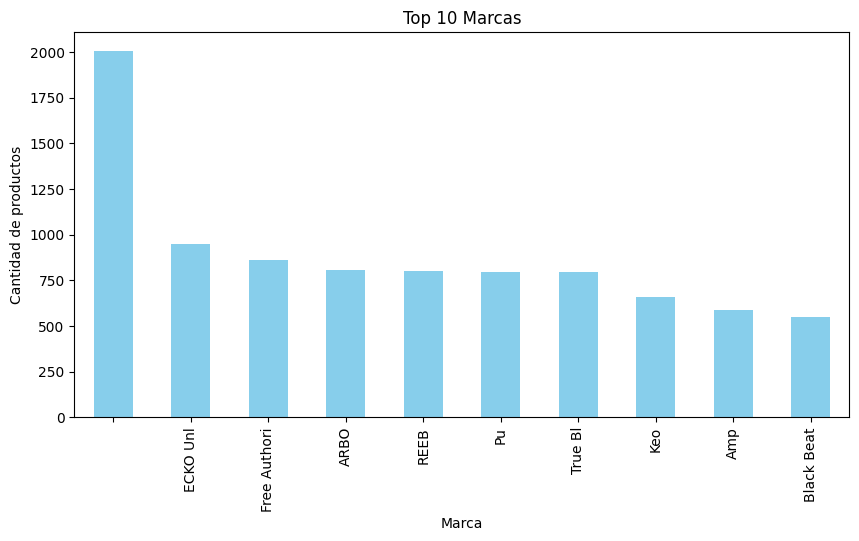

In [ ]:
# 🏬 9. Top vendedores o marcas
plt.figure(figsize=(10,5))
products['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Marcas')
plt.xlabel('Marca')
plt.ylabel('Cantidad de productos')
plt.show()


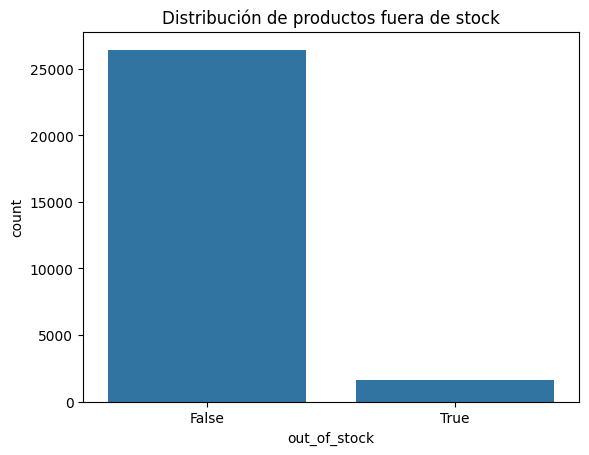

In [ ]:
# 🚫 10. Distribución de productos fuera de stock
if 'out_of_stock' in products.columns:
    sns.countplot(data=products, x='out_of_stock')
    plt.title('Distribución de productos fuera de stock')
    plt.show()


Promedio de palabras por descripción: 29.77


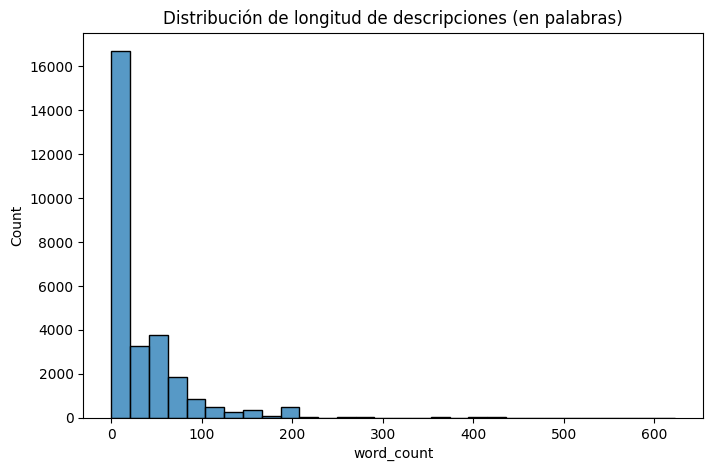

In [ ]:
products['word_count'] = products['description'].apply(lambda x: len(str(x).split()))
products['char_count'] = products['description'].apply(lambda x: len(str(x)))
print("Promedio de palabras por descripción:", round(products['word_count'].mean(), 2))
    
plt.figure(figsize=(8,5))
sns.histplot(products['word_count'], bins=30)
plt.title('Distribución de longitud de descripciones (en palabras)')
plt.show()


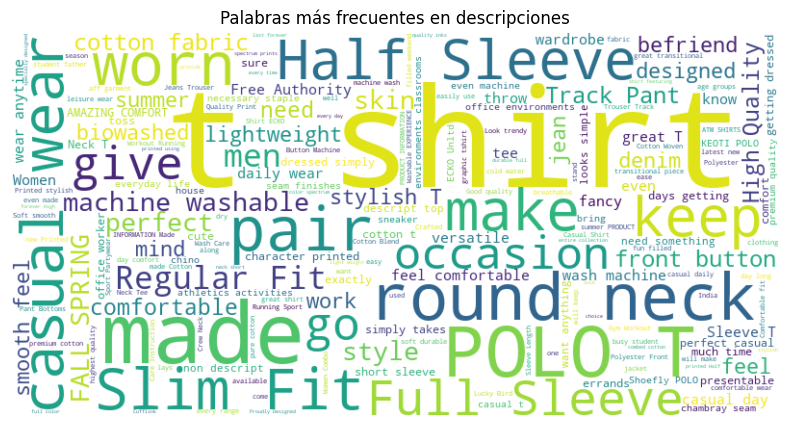

In [ ]:
# ☁️ 12. Word Cloud (nube de palabras más frecuentes)
if 'description' in products.columns:
    text = " ".join(products['description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Palabras más frecuentes en descripciones")
    plt.show()


In [ ]:
# 🧠 13. Entity Recognition (NER)
# Extraemos entidades de las primeras filas
if 'description' in products.columns:
    sample_text = " ".join(products['description'].dropna().astype(str).head(5))
    doc = nlp(sample_text)
    for ent in doc.ents:
        print(ent.text, "-", ent.label_)


NameError: name 'nlp' is not defined